In [1]:
import pandas as pd
import numpy as np
import math
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,10)

## Recopilación de valores medidos de contaminantes en Barcelona Jun-18 a Ene-23

#### Observaciones importantes sobre los históricos:
Debido a incidències técnicas hay periodos d'interrupción sin datos que corresponden a:
- Del 12 julio'18 a las 17h hasta el 23 de julio'18 a las 15h
- Del 23 de agosto'18 a las 16h hasta el 24 de agosto'18 a lss 9h
  ****** - Del 1/2/2019 al 31/3/2019 debido al canvi de fuente y forma de recopilar los datos.
- El 20/6/2019 entre las 7:40h y las 14:00h.
- Del 26/7/2019 a las 13:30h hasta el 29/7/2019 a las 10:40h.
- En el histórico del mes de abril'20 y en el periodo 15/4 a 30/4 la estación con código: 54 no tiene informados los valores de los contaminantes de código : 7,8 y 12 debido a una incidencia en la detección de estos.
- En el histórico del mes de noviembre'20 se presentan la interrupción de datos los siguientes días/horas:
El 4 de la 1:50h y las 10:50h
El 20 de las 19:50h al 21 a las 11:25h
El 27 de las 02:10h al 30 a las 10:05h
- En el histórico del mes de enero'21 se presentan interrupcies de los PM10 en la estación de Palau Reial del jueves 21 a las 16:00h al martes 26 a las 13:00h.

Una vez descargado y formateado los datos, se sustituirán los valores nulos por datos interpolados para simular lo más fielmente posible los valores reales

## Descarga de medidas de Junio de 2018 a Marzo de 2019

In [2]:
years = [2018, 2019]
months = ['Gener','Febrer', 'Marc', 'Abril', 'Maig', 'Juny', 'Juliol', 'Agost', 'Setembre', 'Octubre', 'Novembre', 'Desembre' ]

airq_0618_0319 = pd.DataFrame()
df = pd.DataFrame()

for y in years:
    for m in range(1,len(months)+1):
        if m >=6 and y==2018:
            df = pd.read_csv(f"datos_calidad_aire/{y}_{m:02}_{months[m-1]}_qualitat_aire_BCN.csv")
        if m<=3 and y==2019:
            df = pd.read_csv(f"datos_calidad_aire/{y}_{m:02}_{months[m-1]}_qualitat_aire_BCN.csv")
        airq_0618_0319 = pd.concat([airq_0618_0319, df], ignore_index=True)

airq_0618_0319

,nom_cabina,qualitat_aire,codi_dtes,zqa,codi_eoi,longitud,latitud,hora_o3,qualitat_o3,valor_o3,hora_no2,qualitat_no2,valor_no2,hora_pm10,qualitat_pm10,valor_pm10,generat,dateTime
0,Barcelona - Sants,--,ID,1,8019042,2.1331,41.3788,NaN,NaN,NaN,7h,--,--,NaN,NaN,NaN,11/06/2018 9:00,1528700703
1,Barcelona - Eixample,Bona,IH,1,8019043,2.1538,41.3853,8h,Bona,37 µg/m³,8h,Bona,62 µg/m³,9h,Bona,26 µg/m³,11/06/2018 9:00,1528700703
2,Barcelona - Gràcia,Bona,IJ,1,8019044,2.1534,41.3987,8h,Bona,51 µg/m³,8h,Bona,44 µg/m³,9h,Bona,23 µg/m³,11/06/2018 9:00,1528700703
3,Barcelona - Ciutadella,Bona,IL,1,8019050,2.1874,41.3864,8h,Bona,27 µg/m³,8h,Bona,40 µg/m³,NaN,NaN,NaN,11/06/2018 9:00,1528700703
4,Barcelona - Vall Hebron,Bona,IN,1,8019054,2.1480,41.4261,8h,Bona,22 µg/m³,8h,Bona,54 µg/m³,9h,Bona,18 µg/m³,11/06/2018 9:00,1528700703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106538,Barcelona - Ciutadella,--,IL,1,8019050,2.1874,41.3864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/02/2019 14:00,1554066302
106539,Barcelona - Vall Hebron,--,IN,1,8019054,2.1480,41.4261,NaN,NaN,NaN,NaN,NaN,NaN,12h,--,--,01/02/2019 14:00,1554066302
106540,Barcelona - Palau Reial,--,IZ,1,8019057,2.1151,41.3875,NaN,NaN,NaN,NaN,NaN,NaN,12h,--,--,01/02/2019 14:00,1554066302
106541,Barcelona - Poblenou,--,I2,1,8019004,2.2045,41.4039,NaN,NaN,NaN,NaN,NaN,NaN,12h,--,--,01/02/2019 14:00,1554066302


In [3]:
airq_0618_0319.duplicated().sum()

53352

In [4]:
# Se eliminan duplicados, debido al cambio de formato, la fuente de datos informa de que no hay datos en el mes de febrero y marzo de 2019
airq_0618_0319.drop_duplicates(inplace=True)

In [5]:
airq_0618_0319

,nom_cabina,qualitat_aire,codi_dtes,zqa,codi_eoi,longitud,latitud,hora_o3,qualitat_o3,valor_o3,hora_no2,qualitat_no2,valor_no2,hora_pm10,qualitat_pm10,valor_pm10,generat,dateTime
0,Barcelona - Sants,--,ID,1,8019042,2.1331,41.3788,NaN,NaN,NaN,7h,--,--,NaN,NaN,NaN,11/06/2018 9:00,1528700703
1,Barcelona - Eixample,Bona,IH,1,8019043,2.1538,41.3853,8h,Bona,37 µg/m³,8h,Bona,62 µg/m³,9h,Bona,26 µg/m³,11/06/2018 9:00,1528700703
2,Barcelona - Gràcia,Bona,IJ,1,8019044,2.1534,41.3987,8h,Bona,51 µg/m³,8h,Bona,44 µg/m³,9h,Bona,23 µg/m³,11/06/2018 9:00,1528700703
3,Barcelona - Ciutadella,Bona,IL,1,8019050,2.1874,41.3864,8h,Bona,27 µg/m³,8h,Bona,40 µg/m³,NaN,NaN,NaN,11/06/2018 9:00,1528700703
4,Barcelona - Vall Hebron,Bona,IN,1,8019054,2.1480,41.4261,8h,Bona,22 µg/m³,8h,Bona,54 µg/m³,9h,Bona,18 µg/m³,11/06/2018 9:00,1528700703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53186,Barcelona - Ciutadella,--,IL,1,8019050,2.1874,41.3864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/02/2019 14:00,1554066302
53187,Barcelona - Vall Hebron,--,IN,1,8019054,2.1480,41.4261,NaN,NaN,NaN,NaN,NaN,NaN,12h,--,--,01/02/2019 14:00,1554066302
53188,Barcelona - Palau Reial,--,IZ,1,8019057,2.1151,41.3875,NaN,NaN,NaN,NaN,NaN,NaN,12h,--,--,01/02/2019 14:00,1554066302
53189,Barcelona - Poblenou,--,I2,1,8019004,2.2045,41.4039,NaN,NaN,NaN,NaN,NaN,NaN,12h,--,--,01/02/2019 14:00,1554066302


## Descarga de medidas de Abril de 2019 a Enero de 2023

In [6]:
airq_0419_0123 = pd.DataFrame()
df = pd.DataFrame()

for y in range(2019, 2024):
    for m in range(1,len(months)+1):
        if ((y==2019 and m>=4) or (y>=2020 and y<=2022)):
            df = pd.read_csv(f"datos_calidad_aire/{y}_{m:02}_{months[m-1]}_qualitat_aire_BCN.csv")
        elif y==2023 and m==1:
            df = pd.read_csv(f"datos_calidad_aire/{y}_{m:02}_{months[m-1]}_qualitat_aire_BCN.csv") 
        else:
            df = pd.DataFrame()
        airq_0419_0123 = pd.concat([airq_0419_0123, df], ignore_index=True)

airq_0419_0123

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,CODI_PROVINCIA;PROVINCIA;CODI_MUNICIPI;MUNICIPI;ESTACIO;CODI_CONTAMINANT;ANY;MES;DIA;H01;V01;H02;V02;H03;V03;H04;V04;H05;V05;H06;V06;H07;V07;H08;V08;H09;V09;H10;V10;H11;V11;H12;V12;H13;V13;H14;V14;H15;V15;H16;V16;H17;V17;H18;V18;H19;V19;H20;V20;H21;V21;H22;V22;H23;V23;H24;V24
0,8.0,Barcelona,19.0,Barcelona,4.0,7.0,2019.0,4.0,2.0,1.0,...,V,3.0,V,1.0,V,1.0,V,1.0,V,NaN
1,8.0,Barcelona,19.0,Barcelona,4.0,7.0,2019.0,4.0,3.0,1.0,...,V,2.0,V,2.0,V,2.0,V,2.0,V,NaN
2,8.0,Barcelona,19.0,Barcelona,4.0,7.0,2019.0,4.0,4.0,1.0,...,V,2.0,V,1.0,V,2.0,V,2.0,V,NaN
3,8.0,Barcelona,19.0,Barcelona,4.0,7.0,2019.0,4.0,5.0,2.0,...,V,2.0,V,2.0,V,1.0,V,2.0,V,NaN
4,8.0,Barcelona,19.0,Barcelona,4.0,7.0,2019.0,4.0,6.0,1.0,...,V,2.0,V,2.0,V,1.0,V,3.0,V,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71756,8.0,Barcelona,19.0,Barcelona,58.0,14.0,2023.0,1.0,27.0,62.0,...,V,76.0,V,77.0,V,75.0,V,42.0,V,NaN
71757,8.0,Barcelona,19.0,Barcelona,58.0,14.0,2023.0,1.0,28.0,52.0,...,V,58.0,V,57.0,V,57.0,V,59.0,V,NaN
71758,8.0,Barcelona,19.0,Barcelona,58.0,14.0,2023.0,1.0,29.0,58.0,...,V,63.0,V,58.0,V,50.0,V,62.0,V,NaN
71759,8.0,Barcelona,19.0,Barcelona,58.0,14.0,2023.0,1.0,30.0,60.0,...,V,62.0,V,67.0,V,66.0,V,66.0,V,NaN


In [7]:
# Se detectan 2217 filas de nulos en las primeras columnas en las que los datos son comunes para todos (Provincia, Municipio...)
airq_0419_0123.isnull().sum()

CODI_PROVINCIA                                                                                                                                                                                                                                                                           2217
PROVINCIA                                                                                                                                                                                                                                                                                2217
CODI_MUNICIPI                                                                                                                                                                                                                                                                            2217
MUNICIPI                                                                                                                                      

In [8]:
# Analizando se observa que los datos que deberían estar en las columans, están en un único string con los valores separados ç
# por ; en la última columna
airq_0419_0123_nulls = airq_0419_0123[airq_0419_0123['MUNICIPI'].isnull()]
airq_0419_0123_nulls

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,CODI_PROVINCIA;PROVINCIA;CODI_MUNICIPI;MUNICIPI;ESTACIO;CODI_CONTAMINANT;ANY;MES;DIA;H01;V01;H02;V02;H03;V03;H04;V04;H05;V05;H06;V06;H07;V07;H08;V08;H09;V09;H10;V10;H11;V11;H12;V12;H13;V13;H14;V14;H15;V15;H16;V16;H17;V17;H18;V18;H19;V19;H20;V20;H21;V21;H22;V22;H23;V23;H24;V24
2223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08;Barcelona;019;Barcelona;4;7;2019;6;1;7;V;15...
2224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08;Barcelona;019;Barcelona;4;7;2019;6;2;1;V;2;...
2225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08;Barcelona;019;Barcelona;4;7;2019;6;3;2;V;9;...
2226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08;Barcelona;019;Barcelona;4;7;2019;6;4;2;V;2;...
2227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08;Barcelona;019;Barcelona;4;7;2019;6;5;1;V;2;...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08;Barcelona;019;Barcelona;57;14;2019;7;23;28;...
4436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08;Barcelona;019;Barcelona;57;14;2019;7;24;11;...
4437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08;Barcelona;019;Barcelona;57;14;2019;7;25;12;...
4438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08;Barcelona;019;Barcelona;57;14;2019;7;29;30;...


In [9]:
# Se comprueba que, por ejemplo, el primer valor no esté en recogido en columnas habituales.
# Se tendrá que traspasar estos valores al resto de columnas
airq_0419_0123[(airq_0419_0123['DIA']==1) & (airq_0419_0123['MES']==6) & (airq_0419_0123['ANY']==2019)]

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,CODI_PROVINCIA;PROVINCIA;CODI_MUNICIPI;MUNICIPI;ESTACIO;CODI_CONTAMINANT;ANY;MES;DIA;H01;V01;H02;V02;H03;V03;H04;V04;H05;V05;H06;V06;H07;V07;H08;V08;H09;V09;H10;V10;H11;V11;H12;V12;H13;V13;H14;V14;H15;V15;H16;V16;H17;V17;H18;V18;H19;V19;H20;V20;H21;V21;H22;V22;H23;V23;H24;V24


In [10]:
n_cols = len(airq_0419_0123.columns)
last_col = airq_0419_0123_nulls.columns[n_cols-1]
airq_0419_0123_nulls=airq_0419_0123_nulls.copy()

# se recorren las columnas donde se quieren sustituir los valores nulos
for col in range(4,n_cols-1):
    airq_0419_0123_nulls[airq_0419_0123_nulls.columns[col]] =  [value.split(';')[col] for value in airq_0419_0123_nulls[last_col]]

# se asigna el valor de Municipi que es el mismo para todo el dataframe 
# (no se rellenan las otras columnas de nulos porque no se utilizarán)
airq_0419_0123_nulls['MUNICIPI'] = airq_0419_0123.loc[0,'MUNICIPI']

airq_0419_0123_nulls

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,CODI_PROVINCIA;PROVINCIA;CODI_MUNICIPI;MUNICIPI;ESTACIO;CODI_CONTAMINANT;ANY;MES;DIA;H01;V01;H02;V02;H03;V03;H04;V04;H05;V05;H06;V06;H07;V07;H08;V08;H09;V09;H10;V10;H11;V11;H12;V12;H13;V13;H14;V14;H15;V15;H16;V16;H17;V17;H18;V18;H19;V19;H20;V20;H21;V21;H22;V22;H23;V23;H24;V24
2223,NaN,NaN,NaN,Barcelona,4,7,2019,6,1,7,...,V,4,V,1,V,3,V,1,V,08;Barcelona;019;Barcelona;4;7;2019;6;1;7;V;15...
2224,NaN,NaN,NaN,Barcelona,4,7,2019,6,2,1,...,V,3,V,1,V,1,V,2,V,08;Barcelona;019;Barcelona;4;7;2019;6;2;1;V;2;...
2225,NaN,NaN,NaN,Barcelona,4,7,2019,6,3,2,...,V,6,V,3,V,3,V,2,V,08;Barcelona;019;Barcelona;4;7;2019;6;3;2;V;9;...
2226,NaN,NaN,NaN,Barcelona,4,7,2019,6,4,2,...,V,2,V,1,V,1,V,1,V,08;Barcelona;019;Barcelona;4;7;2019;6;4;2;V;2;...
2227,NaN,NaN,NaN,Barcelona,4,7,2019,6,5,1,...,V,2,V,1,V,2,V,1,V,08;Barcelona;019;Barcelona;4;7;2019;6;5;1;V;2;...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435,NaN,NaN,NaN,Barcelona,57,14,2019,7,23,28,...,V,59,V,47,V,32,V,8,V,08;Barcelona;019;Barcelona;57;14;2019;7;23;28;...
4436,NaN,NaN,NaN,Barcelona,57,14,2019,7,24,11,...,V,49,V,55,V,39,V,26,V,08;Barcelona;019;Barcelona;57;14;2019;7;24;11;...
4437,NaN,NaN,NaN,Barcelona,57,14,2019,7,25,12,...,V,69,V,51,V,29,V,33,V,08;Barcelona;019;Barcelona;57;14;2019;7;25;12;...
4438,NaN,NaN,NaN,Barcelona,57,14,2019,7,29,30,...,V,66,V,52,V,NA,N,NA,N,08;Barcelona;019;Barcelona;57;14;2019;7;29;30;...


In [11]:
# Se añade este último dataframe y se borran las líneas con nulos.
airq_0419_0123_copy = airq_0419_0123
airq_0419_0123 = pd.concat([airq_0419_0123_copy,airq_0419_0123_nulls], ignore_index=True)
airq_0419_0123

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,CODI_PROVINCIA;PROVINCIA;CODI_MUNICIPI;MUNICIPI;ESTACIO;CODI_CONTAMINANT;ANY;MES;DIA;H01;V01;H02;V02;H03;V03;H04;V04;H05;V05;H06;V06;H07;V07;H08;V08;H09;V09;H10;V10;H11;V11;H12;V12;H13;V13;H14;V14;H15;V15;H16;V16;H17;V17;H18;V18;H19;V19;H20;V20;H21;V21;H22;V22;H23;V23;H24;V24
0,8.0,Barcelona,19.0,Barcelona,4.0,7.0,2019.0,4.0,2.0,1.0,...,V,3.0,V,1.0,V,1.0,V,1.0,V,NaN
1,8.0,Barcelona,19.0,Barcelona,4.0,7.0,2019.0,4.0,3.0,1.0,...,V,2.0,V,2.0,V,2.0,V,2.0,V,NaN
2,8.0,Barcelona,19.0,Barcelona,4.0,7.0,2019.0,4.0,4.0,1.0,...,V,2.0,V,1.0,V,2.0,V,2.0,V,NaN
3,8.0,Barcelona,19.0,Barcelona,4.0,7.0,2019.0,4.0,5.0,2.0,...,V,2.0,V,2.0,V,1.0,V,2.0,V,NaN
4,8.0,Barcelona,19.0,Barcelona,4.0,7.0,2019.0,4.0,6.0,1.0,...,V,2.0,V,2.0,V,1.0,V,3.0,V,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73973,NaN,NaN,NaN,Barcelona,57,14,2019,7,23,28,...,V,59,V,47,V,32,V,8,V,08;Barcelona;019;Barcelona;57;14;2019;7;23;28;...
73974,NaN,NaN,NaN,Barcelona,57,14,2019,7,24,11,...,V,49,V,55,V,39,V,26,V,08;Barcelona;019;Barcelona;57;14;2019;7;24;11;...
73975,NaN,NaN,NaN,Barcelona,57,14,2019,7,25,12,...,V,69,V,51,V,29,V,33,V,08;Barcelona;019;Barcelona;57;14;2019;7;25;12;...
73976,NaN,NaN,NaN,Barcelona,57,14,2019,7,29,30,...,V,66,V,52,V,NA,N,NA,N,08;Barcelona;019;Barcelona;57;14;2019;7;29;30;...


In [12]:
airq_0419_0123[airq_0419_0123['MUNICIPI'].isnull()]

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,CODI_PROVINCIA;PROVINCIA;CODI_MUNICIPI;MUNICIPI;ESTACIO;CODI_CONTAMINANT;ANY;MES;DIA;H01;V01;H02;V02;H03;V03;H04;V04;H05;V05;H06;V06;H07;V07;H08;V08;H09;V09;H10;V10;H11;V11;H12;V12;H13;V13;H14;V14;H15;V15;H16;V16;H17;V17;H18;V18;H19;V19;H20;V20;H21;V21;H22;V22;H23;V23;H24;V24
2223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08;Barcelona;019;Barcelona;4;7;2019;6;1;7;V;15...
2224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08;Barcelona;019;Barcelona;4;7;2019;6;2;1;V;2;...
2225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08;Barcelona;019;Barcelona;4;7;2019;6;3;2;V;9;...
2226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08;Barcelona;019;Barcelona;4;7;2019;6;4;2;V;2;...
2227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08;Barcelona;019;Barcelona;4;7;2019;6;5;1;V;2;...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08;Barcelona;019;Barcelona;57;14;2019;7;23;28;...
4436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08;Barcelona;019;Barcelona;57;14;2019;7;24;11;...
4437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08;Barcelona;019;Barcelona;57;14;2019;7;25;12;...
4438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08;Barcelona;019;Barcelona;57;14;2019;7;29;30;...


In [13]:
airq_0419_0123[(airq_0419_0123['DIA']==30) & (airq_0419_0123['MES']==7) & (airq_0419_0123['ANY']==2019)].head()

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,CODI_PROVINCIA;PROVINCIA;CODI_MUNICIPI;MUNICIPI;ESTACIO;CODI_CONTAMINANT;ANY;MES;DIA;H01;V01;H02;V02;H03;V03;H04;V04;H05;V05;H06;V06;H07;V07;H08;V08;H09;V09;H10;V10;H11;V11;H12;V12;H13;V13;H14;V14;H15;V15;H16;V16;H17;V17;H18;V18;H19;V19;H20;V20;H21;V21;H22;V22;H23;V23;H24;V24


In [14]:
# Se eliminan todas las filas con valores nulos en las primeras columnas y que tenían todos los datos en la última columna
airq_0419_0123.drop(airq_0419_0123[airq_0419_0123['MUNICIPI'].isnull()==True].index, inplace=True)
airq_0419_0123.reset_index(drop=True, inplace=True)
airq_0419_0123

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,CODI_PROVINCIA;PROVINCIA;CODI_MUNICIPI;MUNICIPI;ESTACIO;CODI_CONTAMINANT;ANY;MES;DIA;H01;V01;H02;V02;H03;V03;H04;V04;H05;V05;H06;V06;H07;V07;H08;V08;H09;V09;H10;V10;H11;V11;H12;V12;H13;V13;H14;V14;H15;V15;H16;V16;H17;V17;H18;V18;H19;V19;H20;V20;H21;V21;H22;V22;H23;V23;H24;V24
0,8.0,Barcelona,19.0,Barcelona,4.0,7.0,2019.0,4.0,2.0,1.0,...,V,3.0,V,1.0,V,1.0,V,1.0,V,NaN
1,8.0,Barcelona,19.0,Barcelona,4.0,7.0,2019.0,4.0,3.0,1.0,...,V,2.0,V,2.0,V,2.0,V,2.0,V,NaN
2,8.0,Barcelona,19.0,Barcelona,4.0,7.0,2019.0,4.0,4.0,1.0,...,V,2.0,V,1.0,V,2.0,V,2.0,V,NaN
3,8.0,Barcelona,19.0,Barcelona,4.0,7.0,2019.0,4.0,5.0,2.0,...,V,2.0,V,2.0,V,1.0,V,2.0,V,NaN
4,8.0,Barcelona,19.0,Barcelona,4.0,7.0,2019.0,4.0,6.0,1.0,...,V,2.0,V,2.0,V,1.0,V,3.0,V,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71756,NaN,NaN,NaN,Barcelona,57,14,2019,7,23,28,...,V,59,V,47,V,32,V,8,V,08;Barcelona;019;Barcelona;57;14;2019;7;23;28;...
71757,NaN,NaN,NaN,Barcelona,57,14,2019,7,24,11,...,V,49,V,55,V,39,V,26,V,08;Barcelona;019;Barcelona;57;14;2019;7;24;11;...
71758,NaN,NaN,NaN,Barcelona,57,14,2019,7,25,12,...,V,69,V,51,V,29,V,33,V,08;Barcelona;019;Barcelona;57;14;2019;7;25;12;...
71759,NaN,NaN,NaN,Barcelona,57,14,2019,7,29,30,...,V,66,V,52,V,NA,N,NA,N,08;Barcelona;019;Barcelona;57;14;2019;7;29;30;...


In [15]:
# Se pasa a int los valores de ESTACIO, CODI_CONTAMINANT, ANY, MES, DIA

list_col_int = 'ESTACIO','CODI_CONTAMINANT','ANY', 'MES', 'DIA'
for l in list_col_int:
    airq_0419_0123[l]=airq_0419_0123[l].apply(int)

In [16]:
airq_0419_0123

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,CODI_PROVINCIA;PROVINCIA;CODI_MUNICIPI;MUNICIPI;ESTACIO;CODI_CONTAMINANT;ANY;MES;DIA;H01;V01;H02;V02;H03;V03;H04;V04;H05;V05;H06;V06;H07;V07;H08;V08;H09;V09;H10;V10;H11;V11;H12;V12;H13;V13;H14;V14;H15;V15;H16;V16;H17;V17;H18;V18;H19;V19;H20;V20;H21;V21;H22;V22;H23;V23;H24;V24
0,8.0,Barcelona,19.0,Barcelona,4,7,2019,4,2,1.0,...,V,3.0,V,1.0,V,1.0,V,1.0,V,NaN
1,8.0,Barcelona,19.0,Barcelona,4,7,2019,4,3,1.0,...,V,2.0,V,2.0,V,2.0,V,2.0,V,NaN
2,8.0,Barcelona,19.0,Barcelona,4,7,2019,4,4,1.0,...,V,2.0,V,1.0,V,2.0,V,2.0,V,NaN
3,8.0,Barcelona,19.0,Barcelona,4,7,2019,4,5,2.0,...,V,2.0,V,2.0,V,1.0,V,2.0,V,NaN
4,8.0,Barcelona,19.0,Barcelona,4,7,2019,4,6,1.0,...,V,2.0,V,2.0,V,1.0,V,3.0,V,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71756,NaN,NaN,NaN,Barcelona,57,14,2019,7,23,28,...,V,59,V,47,V,32,V,8,V,08;Barcelona;019;Barcelona;57;14;2019;7;23;28;...
71757,NaN,NaN,NaN,Barcelona,57,14,2019,7,24,11,...,V,49,V,55,V,39,V,26,V,08;Barcelona;019;Barcelona;57;14;2019;7;24;11;...
71758,NaN,NaN,NaN,Barcelona,57,14,2019,7,25,12,...,V,69,V,51,V,29,V,33,V,08;Barcelona;019;Barcelona;57;14;2019;7;25;12;...
71759,NaN,NaN,NaN,Barcelona,57,14,2019,7,29,30,...,V,66,V,52,V,NA,N,NA,N,08;Barcelona;019;Barcelona;57;14;2019;7;29;30;...


In [17]:
# Se comprueba que no hay filas duplicadas
airq_0419_0123.duplicated().sum()

0

In [18]:
airq_0419_0123['CODI_CONTAMINANT'].unique()

array([  7,   8,  10,  12,   1,   6,  14,   2,  22, 996, 997, 998, 999,
         9, 901, 101, 106, 107, 108, 109, 110, 112, 114], dtype=int64)

## Tabla de contaminantes

In [19]:
pollutants = pd.read_csv('estaciones_y_contaminantes/qualitat_aire_contaminants.csv')
pollutants

,Codi_Contaminant,Desc_Contaminant,Unitats
0,1,SO2,µg/m³
1,7,NO,µg/m³
2,8,NO2,µg/m³
3,9,PM2.5,µg/m³
4,12,NOx,µg/m³
5,14,O3,µg/m³
6,6,CO,mg/m³
7,10,PM10,µg/m³
8,22,Black Carbon,µg/m³
9,999,Biomassa Black Carbon,%


In [20]:
# Se eliminan las filas de los contaminantes que no aportan información para el estudio. Códigos 999, 998, 997, 996

pollutants = pollutants[~pollutants['Codi_Contaminant'].isin([999,998,997,996])]
pollutants

,Codi_Contaminant,Desc_Contaminant,Unitats
0,1,SO2,µg/m³
1,7,NO,µg/m³
2,8,NO2,µg/m³
3,9,PM2.5,µg/m³
4,12,NOx,µg/m³
5,14,O3,µg/m³
6,6,CO,mg/m³
7,10,PM10,µg/m³
8,22,Black Carbon,µg/m³


In [21]:
pollutants_sel = list(pollutants['Codi_Contaminant'])
pollutants_sel

[1, 7, 8, 9, 12, 14, 6, 10, 22]

In [22]:
pollutants.columns = ['Pollutant_code', 'Pollutant_name', 'Units']
pollutants

,Pollutant_code,Pollutant_name,Units
0,1,SO2,µg/m³
1,7,NO,µg/m³
2,8,NO2,µg/m³
3,9,PM2.5,µg/m³
4,12,NOx,µg/m³
5,14,O3,µg/m³
6,6,CO,mg/m³
7,10,PM10,µg/m³
8,22,Black Carbon,µg/m³


In [23]:
pollutants.to_csv('Pollutants.csv', index=False)

In [24]:
dict_pollutants = dict([(c,n) for c,n in zip(pollutants['Pollutant_code'], pollutants['Pollutant_name'])])
dict_pollutants

{1: 'SO2',
 7: 'NO',
 8: 'NO2',
 9: 'PM2.5',
 12: 'NOx',
 14: 'O3',
 6: 'CO',
 10: 'PM10',
 22: 'Black Carbon'}

## Tabla de estaciones de medida de contaminantes en Barcelona

In [25]:
stations_21 = pd.read_csv('estaciones_y_contaminantes/2021_qualitat_aire_estacions.csv')
stations_21

,Estacio,nom_cabina,codi_dtes,zqa,codi_eoi,Longitud,Latitud,ubicacio,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Clas_1,Clas_2,Codi_Contaminant
0,50,Barcelona - Ciutadella,IL,1,8019050,2.1874,41.3864,Parc de la Ciutadella,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Urbana,Fons,8
1,50,Barcelona - Ciutadella,IL,1,8019050,2.1874,41.3864,Parc de la Ciutadella,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Urbana,Fons,14
2,50,Barcelona - Ciutadella,IL,1,8019050,2.1874,41.3864,Parc de la Ciutadella,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Urbana,Fons,7
3,50,Barcelona - Ciutadella,IL,1,8019050,2.1874,41.3864,Parc de la Ciutadella,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Urbana,Fons,12
4,43,Barcelona - Eixample,IH,1,8019043,2.1538,41.3853,Av. Roma - c/ Comte Urgell,5,Eixample,9,la Nova Esquerra de l'Eixample,Urbana,Trànsit,8
5,43,Barcelona - Eixample,IH,1,8019043,2.1538,41.3853,Av. Roma - c/ Comte Urgell,5,Eixample,9,la Nova Esquerra de l'Eixample,Urbana,Trànsit,14
6,43,Barcelona - Eixample,IH,1,8019043,2.1538,41.3853,Av. Roma - c/ Comte Urgell,5,Eixample,9,la Nova Esquerra de l'Eixample,Urbana,Trànsit,10
7,43,Barcelona - Eixample,IH,1,8019043,2.1538,41.3853,Av. Roma - c/ Comte Urgell,5,Eixample,9,la Nova Esquerra de l'Eixample,Urbana,Trànsit,1
8,43,Barcelona - Eixample,IH,1,8019043,2.1538,41.3853,Av. Roma - c/ Comte Urgell,5,Eixample,9,la Nova Esquerra de l'Eixample,Urbana,Trànsit,6
9,43,Barcelona - Eixample,IH,1,8019043,2.1538,41.3853,Av. Roma - c/ Comte Urgell,5,Eixample,9,la Nova Esquerra de l'Eixample,Urbana,Trànsit,7


In [26]:
stations_22 = pd.read_csv('estaciones_y_contaminantes/2022_qualitat_aire_estacions.csv')
stations_22

,Estacio,nom_cabina,codi_dtes,zqa,codi_eoi,Longitud,Latitud,ubicacio,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Clas_1,Clas_2,Codi_Contaminant
0,50,Barcelona - Ciutadella,IL,1,8019050,2.1874,41.38640,Parc de la Ciutadella,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Urbana,Fons,8
1,50,Barcelona - Ciutadella,IL,1,8019050,2.1874,41.38640,Parc de la Ciutadella,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Urbana,Fons,14
2,50,Barcelona - Ciutadella,IL,1,8019050,2.1874,41.38640,Parc de la Ciutadella,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Urbana,Fons,7
3,50,Barcelona - Ciutadella,IL,1,8019050,2.1874,41.38640,Parc de la Ciutadella,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Urbana,Fons,12
4,43,Barcelona - Eixample,IH,1,8019043,2.1538,41.38530,Av. Roma - c/ Comte Urgell,5,Eixample,9,la Nova Esquerra de l'Eixample,Urbana,Trànsit,8
5,43,Barcelona - Eixample,IH,1,8019043,2.1538,41.38530,Av. Roma - c/ Comte Urgell,5,Eixample,9,la Nova Esquerra de l'Eixample,Urbana,Trànsit,14
6,43,Barcelona - Eixample,IH,1,8019043,2.1538,41.38530,Av. Roma - c/ Comte Urgell,5,Eixample,9,la Nova Esquerra de l'Eixample,Urbana,Trànsit,10
7,43,Barcelona - Eixample,IH,1,8019043,2.1538,41.38530,Av. Roma - c/ Comte Urgell,5,Eixample,9,la Nova Esquerra de l'Eixample,Urbana,Trànsit,1
8,43,Barcelona - Eixample,IH,1,8019043,2.1538,41.38530,Av. Roma - c/ Comte Urgell,5,Eixample,9,la Nova Esquerra de l'Eixample,Urbana,Trànsit,6
9,43,Barcelona - Eixample,IH,1,8019043,2.1538,41.38530,Av. Roma - c/ Comte Urgell,5,Eixample,9,la Nova Esquerra de l'Eixample,Urbana,Trànsit,7


In [27]:
col_stations = ['Estacio','nom_cabina','Longitud','Latitud','ubicacio','Nom_districte','Nom_barri', 'Codi_Contaminant']
stations = stations_22.merge(stations_21, how='outer', on = col_stations)
stations

,Estacio,nom_cabina,codi_dtes_x,zqa_x,codi_eoi_x,Longitud,Latitud,ubicacio,Codi_districte_x,Nom_districte,...,Clas_1_x,Clas_2_x,Codi_Contaminant,codi_dtes_y,zqa_y,codi_eoi_y,Codi_districte_y,Codi_barri_y,Clas_1_y,Clas_2_y
0,50,Barcelona - Ciutadella,IL,1.0,8019050.0,2.1874,41.38640,Parc de la Ciutadella,1.0,Ciutat Vella,...,Urbana,Fons,8,IL,1.0,8019050.0,1.0,4.0,Urbana,Fons
1,50,Barcelona - Ciutadella,IL,1.0,8019050.0,2.1874,41.38640,Parc de la Ciutadella,1.0,Ciutat Vella,...,Urbana,Fons,14,IL,1.0,8019050.0,1.0,4.0,Urbana,Fons
2,50,Barcelona - Ciutadella,IL,1.0,8019050.0,2.1874,41.38640,Parc de la Ciutadella,1.0,Ciutat Vella,...,Urbana,Fons,7,IL,1.0,8019050.0,1.0,4.0,Urbana,Fons
3,50,Barcelona - Ciutadella,IL,1.0,8019050.0,2.1874,41.38640,Parc de la Ciutadella,1.0,Ciutat Vella,...,Urbana,Fons,12,IL,1.0,8019050.0,1.0,4.0,Urbana,Fons
4,43,Barcelona - Eixample,IH,1.0,8019043.0,2.1538,41.38530,Av. Roma - c/ Comte Urgell,5.0,Eixample,...,Urbana,Trànsit,8,IH,1.0,8019043.0,5.0,9.0,Urbana,Trànsit
5,43,Barcelona - Eixample,IH,1.0,8019043.0,2.1538,41.38530,Av. Roma - c/ Comte Urgell,5.0,Eixample,...,Urbana,Trànsit,14,IH,1.0,8019043.0,5.0,9.0,Urbana,Trànsit
6,43,Barcelona - Eixample,IH,1.0,8019043.0,2.1538,41.38530,Av. Roma - c/ Comte Urgell,5.0,Eixample,...,Urbana,Trànsit,10,IH,1.0,8019043.0,5.0,9.0,Urbana,Trànsit
7,43,Barcelona - Eixample,IH,1.0,8019043.0,2.1538,41.38530,Av. Roma - c/ Comte Urgell,5.0,Eixample,...,Urbana,Trànsit,1,IH,1.0,8019043.0,5.0,9.0,Urbana,Trànsit
8,43,Barcelona - Eixample,IH,1.0,8019043.0,2.1538,41.38530,Av. Roma - c/ Comte Urgell,5.0,Eixample,...,Urbana,Trànsit,6,IH,1.0,8019043.0,5.0,9.0,Urbana,Trànsit
9,43,Barcelona - Eixample,IH,1.0,8019043.0,2.1538,41.38530,Av. Roma - c/ Comte Urgell,5.0,Eixample,...,Urbana,Trànsit,7,IH,1.0,8019043.0,5.0,9.0,Urbana,Trànsit


In [28]:
stations = stations[col_stations].sort_values(by=['Estacio','Codi_Contaminant'], ignore_index=True)
stations

,Estacio,nom_cabina,Longitud,Latitud,ubicacio,Nom_districte,Nom_barri,Codi_Contaminant
0,4,Barcelona - Poblenou,2.2045,41.40390,Plaça Josep Trueta (Pujades - Lope de Vega),Sant Marti,el Poblenou,7
1,4,Barcelona - Poblenou,2.2045,41.40390,Plaça Josep Trueta (Pujades - Lope de Vega),Sant Marti,el Poblenou,8
2,4,Barcelona - Poblenou,2.2045,41.40390,Plaça Josep Trueta (Pujades - Lope de Vega),Sant Marti,el Poblenou,10
3,4,Barcelona - Poblenou,2.2045,41.40390,Plaça Josep Trueta (Pujades - Lope de Vega),Sant Marti,el Poblenou,12
4,42,Barcelona - Sants,2.1331,41.37880,Jardins de Can Mantega (Joan Güell - Violant d...,Sants-Montjuic,Sants,7
5,42,Barcelona - Sants,2.1331,41.37880,Jardins de Can Mantega (Joan Güell - Violant d...,Sants-Montjuic,Sants,8
6,42,Barcelona - Sants,2.1331,41.37880,Jardins de Can Mantega (Joan Güell - Violant d...,Sants-Montjuic,Sants,12
7,43,Barcelona - Eixample,2.1538,41.38530,Av. Roma - c/ Comte Urgell,Eixample,la Nova Esquerra de l'Eixample,1
8,43,Barcelona - Eixample,2.1538,41.38530,Av. Roma - c/ Comte Urgell,Eixample,la Nova Esquerra de l'Eixample,6
9,43,Barcelona - Eixample,2.1538,41.38530,Av. Roma - c/ Comte Urgell,Eixample,la Nova Esquerra de l'Eixample,7


In [29]:
stations.columns = ['Station','Station_Name','Longitude','Latitude','Location','District_name','Neighborhood_name', 'Pollutant_code']
stations

,Station,Station_Name,Longitude,Latitude,Location,District_name,Neighborhood_name,Pollutant_code
0,4,Barcelona - Poblenou,2.2045,41.40390,Plaça Josep Trueta (Pujades - Lope de Vega),Sant Marti,el Poblenou,7
1,4,Barcelona - Poblenou,2.2045,41.40390,Plaça Josep Trueta (Pujades - Lope de Vega),Sant Marti,el Poblenou,8
2,4,Barcelona - Poblenou,2.2045,41.40390,Plaça Josep Trueta (Pujades - Lope de Vega),Sant Marti,el Poblenou,10
3,4,Barcelona - Poblenou,2.2045,41.40390,Plaça Josep Trueta (Pujades - Lope de Vega),Sant Marti,el Poblenou,12
4,42,Barcelona - Sants,2.1331,41.37880,Jardins de Can Mantega (Joan Güell - Violant d...,Sants-Montjuic,Sants,7
5,42,Barcelona - Sants,2.1331,41.37880,Jardins de Can Mantega (Joan Güell - Violant d...,Sants-Montjuic,Sants,8
6,42,Barcelona - Sants,2.1331,41.37880,Jardins de Can Mantega (Joan Güell - Violant d...,Sants-Montjuic,Sants,12
7,43,Barcelona - Eixample,2.1538,41.38530,Av. Roma - c/ Comte Urgell,Eixample,la Nova Esquerra de l'Eixample,1
8,43,Barcelona - Eixample,2.1538,41.38530,Av. Roma - c/ Comte Urgell,Eixample,la Nova Esquerra de l'Eixample,6
9,43,Barcelona - Eixample,2.1538,41.38530,Av. Roma - c/ Comte Urgell,Eixample,la Nova Esquerra de l'Eixample,7


In [30]:
list_stations = list(stations['Station_Name'].unique())
list_stations

['Barcelona - Poblenou',
 'Barcelona - Sants',
 'Barcelona - Eixample',
 'Barcelona - Gràcia',
 'Barcelona - Ciutadella',
 'Barcelona - Vall Hebron',
 'Barcelona - Palau Reial',
 'Barcelona - Observatori Fabra']

In [31]:
dict_stations = dict([(s,n) for s,n in zip(stations['Station'], stations['Station_Name'])])
dict_stations

{4: 'Barcelona - Poblenou',
 42: 'Barcelona - Sants',
 43: 'Barcelona - Eixample',
 44: 'Barcelona - Gràcia',
 50: 'Barcelona - Ciutadella',
 54: 'Barcelona - Vall Hebron',
 57: 'Barcelona - Palau Reial',
 58: 'Barcelona - Observatori Fabra'}

In [32]:
# Se observa que en el primer dataframe de los años 18-19, la estación de 'Observatori Fabra' se llama 'Barcelona - Observ Fabra'
# Se modifica por 'Barcelona - Observatori Fabra'
airq_0618_0319['nom_cabina'] = airq_0618_0319['nom_cabina'].replace('Barcelona - Observ Fabra', 'Barcelona - Observatori Fabra')
airq_0618_0319

,nom_cabina,qualitat_aire,codi_dtes,zqa,codi_eoi,longitud,latitud,hora_o3,qualitat_o3,valor_o3,hora_no2,qualitat_no2,valor_no2,hora_pm10,qualitat_pm10,valor_pm10,generat,dateTime
0,Barcelona - Sants,--,ID,1,8019042,2.1331,41.3788,NaN,NaN,NaN,7h,--,--,NaN,NaN,NaN,11/06/2018 9:00,1528700703
1,Barcelona - Eixample,Bona,IH,1,8019043,2.1538,41.3853,8h,Bona,37 µg/m³,8h,Bona,62 µg/m³,9h,Bona,26 µg/m³,11/06/2018 9:00,1528700703
2,Barcelona - Gràcia,Bona,IJ,1,8019044,2.1534,41.3987,8h,Bona,51 µg/m³,8h,Bona,44 µg/m³,9h,Bona,23 µg/m³,11/06/2018 9:00,1528700703
3,Barcelona - Ciutadella,Bona,IL,1,8019050,2.1874,41.3864,8h,Bona,27 µg/m³,8h,Bona,40 µg/m³,NaN,NaN,NaN,11/06/2018 9:00,1528700703
4,Barcelona - Vall Hebron,Bona,IN,1,8019054,2.1480,41.4261,8h,Bona,22 µg/m³,8h,Bona,54 µg/m³,9h,Bona,18 µg/m³,11/06/2018 9:00,1528700703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53186,Barcelona - Ciutadella,--,IL,1,8019050,2.1874,41.3864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/02/2019 14:00,1554066302
53187,Barcelona - Vall Hebron,--,IN,1,8019054,2.1480,41.4261,NaN,NaN,NaN,NaN,NaN,NaN,12h,--,--,01/02/2019 14:00,1554066302
53188,Barcelona - Palau Reial,--,IZ,1,8019057,2.1151,41.3875,NaN,NaN,NaN,NaN,NaN,NaN,12h,--,--,01/02/2019 14:00,1554066302
53189,Barcelona - Poblenou,--,I2,1,8019004,2.2045,41.4039,NaN,NaN,NaN,NaN,NaN,NaN,12h,--,--,01/02/2019 14:00,1554066302


In [33]:
airq_0618_0319

,nom_cabina,qualitat_aire,codi_dtes,zqa,codi_eoi,longitud,latitud,hora_o3,qualitat_o3,valor_o3,hora_no2,qualitat_no2,valor_no2,hora_pm10,qualitat_pm10,valor_pm10,generat,dateTime
0,Barcelona - Sants,--,ID,1,8019042,2.1331,41.3788,NaN,NaN,NaN,7h,--,--,NaN,NaN,NaN,11/06/2018 9:00,1528700703
1,Barcelona - Eixample,Bona,IH,1,8019043,2.1538,41.3853,8h,Bona,37 µg/m³,8h,Bona,62 µg/m³,9h,Bona,26 µg/m³,11/06/2018 9:00,1528700703
2,Barcelona - Gràcia,Bona,IJ,1,8019044,2.1534,41.3987,8h,Bona,51 µg/m³,8h,Bona,44 µg/m³,9h,Bona,23 µg/m³,11/06/2018 9:00,1528700703
3,Barcelona - Ciutadella,Bona,IL,1,8019050,2.1874,41.3864,8h,Bona,27 µg/m³,8h,Bona,40 µg/m³,NaN,NaN,NaN,11/06/2018 9:00,1528700703
4,Barcelona - Vall Hebron,Bona,IN,1,8019054,2.1480,41.4261,8h,Bona,22 µg/m³,8h,Bona,54 µg/m³,9h,Bona,18 µg/m³,11/06/2018 9:00,1528700703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53186,Barcelona - Ciutadella,--,IL,1,8019050,2.1874,41.3864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/02/2019 14:00,1554066302
53187,Barcelona - Vall Hebron,--,IN,1,8019054,2.1480,41.4261,NaN,NaN,NaN,NaN,NaN,NaN,12h,--,--,01/02/2019 14:00,1554066302
53188,Barcelona - Palau Reial,--,IZ,1,8019057,2.1151,41.3875,NaN,NaN,NaN,NaN,NaN,NaN,12h,--,--,01/02/2019 14:00,1554066302
53189,Barcelona - Poblenou,--,I2,1,8019004,2.2045,41.4039,NaN,NaN,NaN,NaN,NaN,NaN,12h,--,--,01/02/2019 14:00,1554066302


In [34]:
# Se eliminan las filas donde se indican los contaminantes que no vamos a estudiar.

stations = stations[stations['Pollutant_code'].isin(pollutants_sel)]
stations

,Station,Station_Name,Longitude,Latitude,Location,District_name,Neighborhood_name,Pollutant_code
0,4,Barcelona - Poblenou,2.2045,41.40390,Plaça Josep Trueta (Pujades - Lope de Vega),Sant Marti,el Poblenou,7
1,4,Barcelona - Poblenou,2.2045,41.40390,Plaça Josep Trueta (Pujades - Lope de Vega),Sant Marti,el Poblenou,8
2,4,Barcelona - Poblenou,2.2045,41.40390,Plaça Josep Trueta (Pujades - Lope de Vega),Sant Marti,el Poblenou,10
3,4,Barcelona - Poblenou,2.2045,41.40390,Plaça Josep Trueta (Pujades - Lope de Vega),Sant Marti,el Poblenou,12
4,42,Barcelona - Sants,2.1331,41.37880,Jardins de Can Mantega (Joan Güell - Violant d...,Sants-Montjuic,Sants,7
5,42,Barcelona - Sants,2.1331,41.37880,Jardins de Can Mantega (Joan Güell - Violant d...,Sants-Montjuic,Sants,8
6,42,Barcelona - Sants,2.1331,41.37880,Jardins de Can Mantega (Joan Güell - Violant d...,Sants-Montjuic,Sants,12
7,43,Barcelona - Eixample,2.1538,41.38530,Av. Roma - c/ Comte Urgell,Eixample,la Nova Esquerra de l'Eixample,1
8,43,Barcelona - Eixample,2.1538,41.38530,Av. Roma - c/ Comte Urgell,Eixample,la Nova Esquerra de l'Eixample,6
9,43,Barcelona - Eixample,2.1538,41.38530,Av. Roma - c/ Comte Urgell,Eixample,la Nova Esquerra de l'Eixample,7


In [35]:
stations.reset_index(drop=True, inplace=True)

In [36]:
stations

,Station,Station_Name,Longitude,Latitude,Location,District_name,Neighborhood_name,Pollutant_code
0,4,Barcelona - Poblenou,2.2045,41.40390,Plaça Josep Trueta (Pujades - Lope de Vega),Sant Marti,el Poblenou,7
1,4,Barcelona - Poblenou,2.2045,41.40390,Plaça Josep Trueta (Pujades - Lope de Vega),Sant Marti,el Poblenou,8
2,4,Barcelona - Poblenou,2.2045,41.40390,Plaça Josep Trueta (Pujades - Lope de Vega),Sant Marti,el Poblenou,10
3,4,Barcelona - Poblenou,2.2045,41.40390,Plaça Josep Trueta (Pujades - Lope de Vega),Sant Marti,el Poblenou,12
4,42,Barcelona - Sants,2.1331,41.37880,Jardins de Can Mantega (Joan Güell - Violant d...,Sants-Montjuic,Sants,7
5,42,Barcelona - Sants,2.1331,41.37880,Jardins de Can Mantega (Joan Güell - Violant d...,Sants-Montjuic,Sants,8
6,42,Barcelona - Sants,2.1331,41.37880,Jardins de Can Mantega (Joan Güell - Violant d...,Sants-Montjuic,Sants,12
7,43,Barcelona - Eixample,2.1538,41.38530,Av. Roma - c/ Comte Urgell,Eixample,la Nova Esquerra de l'Eixample,1
8,43,Barcelona - Eixample,2.1538,41.38530,Av. Roma - c/ Comte Urgell,Eixample,la Nova Esquerra de l'Eixample,6
9,43,Barcelona - Eixample,2.1538,41.38530,Av. Roma - c/ Comte Urgell,Eixample,la Nova Esquerra de l'Eixample,7


In [37]:
stations.to_csv('Stations.csv', index=False)

## Tabla de medidas de contaminantes de Junio de 2018 a Enero de 2023

In [38]:
airq_0618_0319.columns

Index(['nom_cabina', 'qualitat_aire', 'codi_dtes', 'zqa', 'codi_eoi',
       'longitud', 'latitud', 'hora_o3', 'qualitat_o3', 'valor_o3', 'hora_no2',
       'qualitat_no2', 'valor_no2', 'hora_pm10', 'qualitat_pm10', 'valor_pm10',
       'generat', 'dateTime'],
      dtype='object')

In [39]:
airq_0419_0123.columns

Index(['CODI_PROVINCIA', 'PROVINCIA', 'CODI_MUNICIPI', 'MUNICIPI', 'ESTACIO',
       'CODI_CONTAMINANT', 'ANY', 'MES', 'DIA', 'H01', 'V01', 'H02', 'V02',
       'H03', 'V03', 'H04', 'V04', 'H05', 'V05', 'H06', 'V06', 'H07', 'V07',
       'H08', 'V08', 'H09', 'V09', 'H10', 'V10', 'H11', 'V11', 'H12', 'V12',
       'H13', 'V13', 'H14', 'V14', 'H15', 'V15', 'H16', 'V16', 'H17', 'V17',
       'H18', 'V18', 'H19', 'V19', 'H20', 'V20', 'H21', 'V21', 'H22', 'V22',
       'H23', 'V23', 'H24', 'V24',
       'CODI_PROVINCIA;PROVINCIA;CODI_MUNICIPI;MUNICIPI;ESTACIO;CODI_CONTAMINANT;ANY;MES;DIA;H01;V01;H02;V02;H03;V03;H04;V04;H05;V05;H06;V06;H07;V07;H08;V08;H09;V09;H10;V10;H11;V11;H12;V12;H13;V13;H14;V14;H15;V15;H16;V16;H17;V17;H18;V18;H19;V19;H20;V20;H21;V21;H22;V22;H23;V23;H24;V24'],
      dtype='object')

### Reorganización y cambio de nombres de columnas para unir los dos dataframes

#### Dataframe Junio-18 a Marzo-19

In [40]:
# Se pasan las columnas 'hora_o3', 'hora_no2', 'hora_pm10' a filas
# Se eligen solo las columnas necesarias a mantener

airq1_1 = airq_0618_0319.melt(id_vars=['nom_cabina', 'generat'], value_vars = ['hora_o3', 'hora_no2', 'hora_pm10'], var_name = 'Pollutant_name', value_name='Hour')
airq1_1.head()

,nom_cabina,generat,Pollutant_name,Hour
0,Barcelona - Sants,11/06/2018 9:00,hora_o3,NaN
1,Barcelona - Eixample,11/06/2018 9:00,hora_o3,8h
2,Barcelona - Gràcia,11/06/2018 9:00,hora_o3,8h
3,Barcelona - Ciutadella,11/06/2018 9:00,hora_o3,8h
4,Barcelona - Vall Hebron,11/06/2018 9:00,hora_o3,8h


In [41]:
airq1_1['Hour'] = airq1_1['Hour'].str.replace('h','')

In [42]:
airq1_1['Hour'] = airq1_1['Hour'].fillna(pd.to_datetime(airq1_1['generat']).dt.hour)
airq1_1

,nom_cabina,generat,Pollutant_name,Hour
0,Barcelona - Sants,11/06/2018 9:00,hora_o3,9
1,Barcelona - Eixample,11/06/2018 9:00,hora_o3,8
2,Barcelona - Gràcia,11/06/2018 9:00,hora_o3,8
3,Barcelona - Ciutadella,11/06/2018 9:00,hora_o3,8
4,Barcelona - Vall Hebron,11/06/2018 9:00,hora_o3,8
...,...,...,...,...
159568,Barcelona - Ciutadella,01/02/2019 14:00,hora_pm10,14
159569,Barcelona - Vall Hebron,01/02/2019 14:00,hora_pm10,12
159570,Barcelona - Palau Reial,01/02/2019 14:00,hora_pm10,12
159571,Barcelona - Poblenou,01/02/2019 14:00,hora_pm10,12


In [43]:
airq1_1['Hour'] = airq1_1['Hour'].apply(int)

In [44]:
# Se modifican los datos de columna Pollutant_code dejando el nombre del contaminante y se sustituye por el código

airq1_1['Pollutant_name'] = airq1_1['Pollutant_name'].str.upper().str.replace('HORA_','')
airq1_1

,nom_cabina,generat,Pollutant_name,Hour
0,Barcelona - Sants,11/06/2018 9:00,O3,9
1,Barcelona - Eixample,11/06/2018 9:00,O3,8
2,Barcelona - Gràcia,11/06/2018 9:00,O3,8
3,Barcelona - Ciutadella,11/06/2018 9:00,O3,8
4,Barcelona - Vall Hebron,11/06/2018 9:00,O3,8
...,...,...,...,...
159568,Barcelona - Ciutadella,01/02/2019 14:00,PM10,14
159569,Barcelona - Vall Hebron,01/02/2019 14:00,PM10,12
159570,Barcelona - Palau Reial,01/02/2019 14:00,PM10,12
159571,Barcelona - Poblenou,01/02/2019 14:00,PM10,12


In [45]:
# Se pasan las columnas 'valor_o3', 'valor_no2', 'valor_pm10' a filas eligiendo las columnas necesarias a mantener

airq1_2 = airq_0618_0319.melt(id_vars=['nom_cabina', 'generat'], value_vars = ['valor_o3', 'valor_no2', 'valor_pm10'], var_name = 'Pollutant_name', value_name='Value')
airq1_2.head()

,nom_cabina,generat,Pollutant_name,Value
0,Barcelona - Sants,11/06/2018 9:00,valor_o3,NaN
1,Barcelona - Eixample,11/06/2018 9:00,valor_o3,37 µg/m³
2,Barcelona - Gràcia,11/06/2018 9:00,valor_o3,51 µg/m³
3,Barcelona - Ciutadella,11/06/2018 9:00,valor_o3,27 µg/m³
4,Barcelona - Vall Hebron,11/06/2018 9:00,valor_o3,22 µg/m³


In [46]:
# Se elimina µg/m³ y se pone como nulos los valores que no tienen números
airq1_2['Value'] = airq1_2['Value'].str.replace(' µg/m³','')
airq1_2['Value'] = airq1_2['Value'].replace('--', np.nan)
airq1_2['Value'] = airq1_2['Value'].replace('',np.nan)
airq1_2['Value'] = airq1_2['Value'].replace('µg/m³',np.nan)

airq1_2

,nom_cabina,generat,Pollutant_name,Value
0,Barcelona - Sants,11/06/2018 9:00,valor_o3,NaN
1,Barcelona - Eixample,11/06/2018 9:00,valor_o3,37
2,Barcelona - Gràcia,11/06/2018 9:00,valor_o3,51
3,Barcelona - Ciutadella,11/06/2018 9:00,valor_o3,27
4,Barcelona - Vall Hebron,11/06/2018 9:00,valor_o3,22
...,...,...,...,...
159568,Barcelona - Ciutadella,01/02/2019 14:00,valor_pm10,NaN
159569,Barcelona - Vall Hebron,01/02/2019 14:00,valor_pm10,NaN
159570,Barcelona - Palau Reial,01/02/2019 14:00,valor_pm10,NaN
159571,Barcelona - Poblenou,01/02/2019 14:00,valor_pm10,NaN


In [47]:
airq1_2['Value'].unique()

array([nan, '37', '51', '27', '22', '36', '50', '54', '55', '64', '59',
       '69', '68', '74', '80', '63', '95', '87', '86', '58', '71', '89',
       '67', '85', '82', '75', '78', '60', '88', '53', '65', '61', '66',
       '72', '73', '77', '81', '70', '83', '84', '43', '45', '29', '23',
       '40', '25', '30', '35', '46', '42', '62', '48', '56', '57', '52',
       '76', '79', '90', '91', '49', '38', '47', '32', '44', '96', '110',
       '97', '104', '102', '103', '93', '39', '33', '20', '14', '41',
       '92', '18', '31', '34', '21', '26', '28', '19', '16', '99', '98',
       '15', '11', '17', '10', '8', '12', '24', '4', '6', '3', '7', '5',
       '13', '1', '94', '114', '109', '9', '117', '122', '2', '115',
       '101', '112', '111', '134', '118', '105', '100', '108', '106',
       '107', '113', '161', '315', '130', '129', '288', '128', '351',
       '133', '125', '116', '137', '121', '127', '120', '142', '151',
       '141', '150', '131', '136', '123', '119', '124', '126', '132

In [48]:
# Al venir del mismo dataset y solicitar el melt de la misma forma, 
# se añade la columna Value del dataframe airq1_2 al dataframe airq1_1

airq1_1['Value'] = airq1_2['Value']
airq1 = airq1_1
airq1

,nom_cabina,generat,Pollutant_name,Hour,Value
0,Barcelona - Sants,11/06/2018 9:00,O3,9,NaN
1,Barcelona - Eixample,11/06/2018 9:00,O3,8,37
2,Barcelona - Gràcia,11/06/2018 9:00,O3,8,51
3,Barcelona - Ciutadella,11/06/2018 9:00,O3,8,27
4,Barcelona - Vall Hebron,11/06/2018 9:00,O3,8,22
...,...,...,...,...,...
159568,Barcelona - Ciutadella,01/02/2019 14:00,PM10,14,NaN
159569,Barcelona - Vall Hebron,01/02/2019 14:00,PM10,12,NaN
159570,Barcelona - Palau Reial,01/02/2019 14:00,PM10,12,NaN
159571,Barcelona - Poblenou,01/02/2019 14:00,PM10,12,NaN


In [49]:
airq1['Pollutant_name'].unique()

array(['O3', 'NO2', 'PM10'], dtype=object)

In [50]:
airq1.isnull().sum()  # Se detectan nulos en la columna value, se les asignarán los valores interpolados al unir todos los datos

nom_cabina            0
generat               0
Pollutant_name        0
Hour                  0
Value             69258
dtype: int64

In [51]:
# Se cambian nombres de columnas y se añaden algunas para igualar al segundo dataframe
airq1.columns = ['Station_name', 'Date', 'Pollutant_name', 'Hour', 'Value']
airq1['City'] = 'Barcelona'

In [52]:
airq1['Year'] = pd.to_datetime(airq1_1['Date']).dt.year
airq1['Month'] = pd.to_datetime(airq1_1['Date'], dayfirst=True).dt.month
airq1['Day'] = pd.to_datetime(airq1_1['Date'], dayfirst=True).dt.day

In [53]:
airq1

,Station_name,Date,Pollutant_name,Hour,Value,City,Year,Month,Day
0,Barcelona - Sants,11/06/2018 9:00,O3,9,NaN,Barcelona,2018,6,11
1,Barcelona - Eixample,11/06/2018 9:00,O3,8,37,Barcelona,2018,6,11
2,Barcelona - Gràcia,11/06/2018 9:00,O3,8,51,Barcelona,2018,6,11
3,Barcelona - Ciutadella,11/06/2018 9:00,O3,8,27,Barcelona,2018,6,11
4,Barcelona - Vall Hebron,11/06/2018 9:00,O3,8,22,Barcelona,2018,6,11
...,...,...,...,...,...,...,...,...,...
159568,Barcelona - Ciutadella,01/02/2019 14:00,PM10,14,NaN,Barcelona,2019,2,1
159569,Barcelona - Vall Hebron,01/02/2019 14:00,PM10,12,NaN,Barcelona,2019,2,1
159570,Barcelona - Palau Reial,01/02/2019 14:00,PM10,12,NaN,Barcelona,2019,2,1
159571,Barcelona - Poblenou,01/02/2019 14:00,PM10,12,NaN,Barcelona,2019,2,1


In [54]:
airq1 = airq1[['City','Station_name', 'Date','Year', 'Month', 'Day', 'Hour', 'Pollutant_name', 'Value']]
airq1

,City,Station_name,Date,Year,Month,Day,Hour,Pollutant_name,Value
0,Barcelona,Barcelona - Sants,11/06/2018 9:00,2018,6,11,9,O3,NaN
1,Barcelona,Barcelona - Eixample,11/06/2018 9:00,2018,6,11,8,O3,37
2,Barcelona,Barcelona - Gràcia,11/06/2018 9:00,2018,6,11,8,O3,51
3,Barcelona,Barcelona - Ciutadella,11/06/2018 9:00,2018,6,11,8,O3,27
4,Barcelona,Barcelona - Vall Hebron,11/06/2018 9:00,2018,6,11,8,O3,22
...,...,...,...,...,...,...,...,...,...
159568,Barcelona,Barcelona - Ciutadella,01/02/2019 14:00,2019,2,1,14,PM10,NaN
159569,Barcelona,Barcelona - Vall Hebron,01/02/2019 14:00,2019,2,1,12,PM10,NaN
159570,Barcelona,Barcelona - Palau Reial,01/02/2019 14:00,2019,2,1,12,PM10,NaN
159571,Barcelona,Barcelona - Poblenou,01/02/2019 14:00,2019,2,1,12,PM10,NaN


#### Dataframe Abril-19 a Enero-23

In [55]:
# Se pasan las columnas 'H01', 'V01', 'H02', 'V02','H03', 'V03', 'H04', 'V04', 'H05', 'V05', 'H06', 'V06', 'H07', 'V07','H08',
# 'V08', 'H09', 'V09', 'H10', 'V10', 'H11', 'V11', 'H12', 'V12','H13', 'V13', 'H14', 'V14', 'H15', 'V15', 'H16', 'V16', 'H17',
# 'V17','H18', 'V18', 'H19', 'V19', 'H20', 'V20', 'H21', 'V21', 'H22', 'V22','H23', 'V23', 'H24', 'V24'  a filas
# Se eligen solo las columnas necesarias a mantener
airq2 = airq_0419_0123.melt(id_vars=['MUNICIPI', 'ESTACIO', 'CODI_CONTAMINANT', 'ANY', 'MES', 'DIA'], value_vars = [f"H{num:02d}" for num in range(1,25)], var_name = 'Hour', value_name='Value')
airq2

,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,Hour,Value
0,Barcelona,4,7,2019,4,2,H01,1.0
1,Barcelona,4,7,2019,4,3,H01,1.0
2,Barcelona,4,7,2019,4,4,H01,1.0
3,Barcelona,4,7,2019,4,5,H01,2.0
4,Barcelona,4,7,2019,4,6,H01,1.0
...,...,...,...,...,...,...,...,...
1722259,Barcelona,57,14,2019,7,23,H24,8
1722260,Barcelona,57,14,2019,7,24,H24,26
1722261,Barcelona,57,14,2019,7,25,H24,33
1722262,Barcelona,57,14,2019,7,29,H24,NA


In [56]:
airq2['Hour'] = airq2['Hour'].str.replace('H','').astype(int)
airq2

,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,Hour,Value
0,Barcelona,4,7,2019,4,2,1,1.0
1,Barcelona,4,7,2019,4,3,1,1.0
2,Barcelona,4,7,2019,4,4,1,1.0
3,Barcelona,4,7,2019,4,5,1,2.0
4,Barcelona,4,7,2019,4,6,1,1.0
...,...,...,...,...,...,...,...,...
1722259,Barcelona,57,14,2019,7,23,24,8
1722260,Barcelona,57,14,2019,7,24,24,26
1722261,Barcelona,57,14,2019,7,25,24,33
1722262,Barcelona,57,14,2019,7,29,24,NA


In [57]:
airq2['Hour'].replace(24,0, inplace=True)
airq2

,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,Hour,Value
0,Barcelona,4,7,2019,4,2,1,1.0
1,Barcelona,4,7,2019,4,3,1,1.0
2,Barcelona,4,7,2019,4,4,1,1.0
3,Barcelona,4,7,2019,4,5,1,2.0
4,Barcelona,4,7,2019,4,6,1,1.0
...,...,...,...,...,...,...,...,...
1722259,Barcelona,57,14,2019,7,23,0,8
1722260,Barcelona,57,14,2019,7,24,0,26
1722261,Barcelona,57,14,2019,7,25,0,33
1722262,Barcelona,57,14,2019,7,29,0,NA


In [58]:
# En la columna Value, se sustituye NA por nulos 
airq2['Value'].replace('NA', np.nan, inplace=True)
airq2

,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,Hour,Value
0,Barcelona,4,7,2019,4,2,1,1.0
1,Barcelona,4,7,2019,4,3,1,1.0
2,Barcelona,4,7,2019,4,4,1,1.0
3,Barcelona,4,7,2019,4,5,1,2.0
4,Barcelona,4,7,2019,4,6,1,1.0
...,...,...,...,...,...,...,...,...
1722259,Barcelona,57,14,2019,7,23,0,8
1722260,Barcelona,57,14,2019,7,24,0,26
1722261,Barcelona,57,14,2019,7,25,0,33
1722262,Barcelona,57,14,2019,7,29,0,NaN


In [59]:
# Se renombran las columna para igualar los dos dataframes
airq2.columns=['City','Station_name', 'Pollutant_name','Year', 'Month', 'Day', 'Hour', 'Value']

In [60]:
airq2[['Year','Month','Day']].isnull().sum()

Year     0
Month    0
Day      0
dtype: int64

In [61]:
airq2[['Year','Month','Day']] = airq2[['Year','Month','Day']].applymap(int)
airq2

,City,Station_name,Pollutant_name,Year,Month,Day,Hour,Value
0,Barcelona,4,7,2019,4,2,1,1.0
1,Barcelona,4,7,2019,4,3,1,1.0
2,Barcelona,4,7,2019,4,4,1,1.0
3,Barcelona,4,7,2019,4,5,1,2.0
4,Barcelona,4,7,2019,4,6,1,1.0
...,...,...,...,...,...,...,...,...
1722259,Barcelona,57,14,2019,7,23,0,8
1722260,Barcelona,57,14,2019,7,24,0,26
1722261,Barcelona,57,14,2019,7,25,0,33
1722262,Barcelona,57,14,2019,7,29,0,NaN


In [62]:
airq2['Date']= pd.to_datetime(airq2[['Day', 'Month','Year','Hour']], dayfirst=True).apply(lambda x: x.strftime('%d/%m/%Y %H:%M'))
airq2

,City,Station_name,Pollutant_name,Year,Month,Day,Hour,Value,Date
0,Barcelona,4,7,2019,4,2,1,1.0,02/04/2019 01:00
1,Barcelona,4,7,2019,4,3,1,1.0,03/04/2019 01:00
2,Barcelona,4,7,2019,4,4,1,1.0,04/04/2019 01:00
3,Barcelona,4,7,2019,4,5,1,2.0,05/04/2019 01:00
4,Barcelona,4,7,2019,4,6,1,1.0,06/04/2019 01:00
...,...,...,...,...,...,...,...,...,...
1722259,Barcelona,57,14,2019,7,23,0,8,23/07/2019 00:00
1722260,Barcelona,57,14,2019,7,24,0,26,24/07/2019 00:00
1722261,Barcelona,57,14,2019,7,25,0,33,25/07/2019 00:00
1722262,Barcelona,57,14,2019,7,29,0,NaN,29/07/2019 00:00


In [63]:
# Se cambia el código de estación por el nombre
airq2['Station_name'] = airq2['Station_name'].apply(lambda x: dict_stations[x])

In [64]:
# Se dejan solo los contaminantes seleccionados en la tabla de contaminantes
airq2= airq2[airq2['Pollutant_name'].isin(dict_pollutants.keys())]
airq2.reset_index()

,index,City,Station_name,Pollutant_name,Year,Month,Day,Hour,Value,Date
0,0,Barcelona,Barcelona - Poblenou,7,2019,4,2,1,1.0,02/04/2019 01:00
1,1,Barcelona,Barcelona - Poblenou,7,2019,4,3,1,1.0,03/04/2019 01:00
2,2,Barcelona,Barcelona - Poblenou,7,2019,4,4,1,1.0,04/04/2019 01:00
3,3,Barcelona,Barcelona - Poblenou,7,2019,4,5,1,2.0,05/04/2019 01:00
4,4,Barcelona,Barcelona - Poblenou,7,2019,4,6,1,1.0,06/04/2019 01:00
...,...,...,...,...,...,...,...,...,...,...
1481347,1722259,Barcelona,Barcelona - Palau Reial,14,2019,7,23,0,8,23/07/2019 00:00
1481348,1722260,Barcelona,Barcelona - Palau Reial,14,2019,7,24,0,26,24/07/2019 00:00
1481349,1722261,Barcelona,Barcelona - Palau Reial,14,2019,7,25,0,33,25/07/2019 00:00
1481350,1722262,Barcelona,Barcelona - Palau Reial,14,2019,7,29,0,NaN,29/07/2019 00:00


In [65]:
airq2 = airq2.copy()
airq2['Pollutant_name'] = airq2['Pollutant_name'].apply(lambda x: dict_pollutants[x])
airq2

,City,Station_name,Pollutant_name,Year,Month,Day,Hour,Value,Date
0,Barcelona,Barcelona - Poblenou,NO,2019,4,2,1,1.0,02/04/2019 01:00
1,Barcelona,Barcelona - Poblenou,NO,2019,4,3,1,1.0,03/04/2019 01:00
2,Barcelona,Barcelona - Poblenou,NO,2019,4,4,1,1.0,04/04/2019 01:00
3,Barcelona,Barcelona - Poblenou,NO,2019,4,5,1,2.0,05/04/2019 01:00
4,Barcelona,Barcelona - Poblenou,NO,2019,4,6,1,1.0,06/04/2019 01:00
...,...,...,...,...,...,...,...,...,...
1722259,Barcelona,Barcelona - Palau Reial,O3,2019,7,23,0,8,23/07/2019 00:00
1722260,Barcelona,Barcelona - Palau Reial,O3,2019,7,24,0,26,24/07/2019 00:00
1722261,Barcelona,Barcelona - Palau Reial,O3,2019,7,25,0,33,25/07/2019 00:00
1722262,Barcelona,Barcelona - Palau Reial,O3,2019,7,29,0,NaN,29/07/2019 00:00


In [66]:
airq2 = airq2[['City','Station_name', 'Date','Year', 'Month', 'Day', 'Hour', 'Pollutant_name', 'Value']]
airq2

,City,Station_name,Date,Year,Month,Day,Hour,Pollutant_name,Value
0,Barcelona,Barcelona - Poblenou,02/04/2019 01:00,2019,4,2,1,NO,1.0
1,Barcelona,Barcelona - Poblenou,03/04/2019 01:00,2019,4,3,1,NO,1.0
2,Barcelona,Barcelona - Poblenou,04/04/2019 01:00,2019,4,4,1,NO,1.0
3,Barcelona,Barcelona - Poblenou,05/04/2019 01:00,2019,4,5,1,NO,2.0
4,Barcelona,Barcelona - Poblenou,06/04/2019 01:00,2019,4,6,1,NO,1.0
...,...,...,...,...,...,...,...,...,...
1722259,Barcelona,Barcelona - Palau Reial,23/07/2019 00:00,2019,7,23,0,O3,8
1722260,Barcelona,Barcelona - Palau Reial,24/07/2019 00:00,2019,7,24,0,O3,26
1722261,Barcelona,Barcelona - Palau Reial,25/07/2019 00:00,2019,7,25,0,O3,33
1722262,Barcelona,Barcelona - Palau Reial,29/07/2019 00:00,2019,7,29,0,O3,NaN


In [67]:
airq = pd.concat([airq1, airq2], ignore_index=True)
airq

,City,Station_name,Date,Year,Month,Day,Hour,Pollutant_name,Value
0,Barcelona,Barcelona - Sants,11/06/2018 9:00,2018,6,11,9,O3,NaN
1,Barcelona,Barcelona - Eixample,11/06/2018 9:00,2018,6,11,8,O3,37
2,Barcelona,Barcelona - Gràcia,11/06/2018 9:00,2018,6,11,8,O3,51
3,Barcelona,Barcelona - Ciutadella,11/06/2018 9:00,2018,6,11,8,O3,27
4,Barcelona,Barcelona - Vall Hebron,11/06/2018 9:00,2018,6,11,8,O3,22
...,...,...,...,...,...,...,...,...,...
1640920,Barcelona,Barcelona - Palau Reial,23/07/2019 00:00,2019,7,23,0,O3,8
1640921,Barcelona,Barcelona - Palau Reial,24/07/2019 00:00,2019,7,24,0,O3,26
1640922,Barcelona,Barcelona - Palau Reial,25/07/2019 00:00,2019,7,25,0,O3,33
1640923,Barcelona,Barcelona - Palau Reial,29/07/2019 00:00,2019,7,29,0,O3,NaN


In [68]:
airq['Pollutant_name'].unique()

array(['O3', 'NO2', 'PM10', 'NO', 'NOx', 'SO2', 'CO', 'Black Carbon',
       'PM2.5'], dtype=object)

In [69]:
airq = airq.copy()
airq.sort_values(by=['Year','Month','Day', 'Hour', 'Station_name', 'Pollutant_name'], inplace=True, ignore_index=True)
airq

,City,Station_name,Date,Year,Month,Day,Hour,Pollutant_name,Value
0,Barcelona,Barcelona - Sants,11/06/2018 9:00,2018,6,11,7,NO2,NaN
1,Barcelona,Barcelona - Ciutadella,11/06/2018 9:00,2018,6,11,8,NO2,40
2,Barcelona,Barcelona - Ciutadella,11/06/2018 9:00,2018,6,11,8,O3,27
3,Barcelona,Barcelona - Eixample,11/06/2018 9:00,2018,6,11,8,NO2,62
4,Barcelona,Barcelona - Eixample,11/06/2018 9:00,2018,6,11,8,O3,37
...,...,...,...,...,...,...,...,...,...
1640920,Barcelona,Barcelona - Vall Hebron,31/01/2023 23:00,2023,1,31,23,NO2,33.0
1640921,Barcelona,Barcelona - Vall Hebron,31/01/2023 23:00,2023,1,31,23,NOx,40.0
1640922,Barcelona,Barcelona - Vall Hebron,31/01/2023 23:00,2023,1,31,23,O3,44.0
1640923,Barcelona,Barcelona - Vall Hebron,31/01/2023 23:00,2023,1,31,23,PM10,11.0


In [70]:
# Se unifican todos los valore a tipo float
airq['Value'] = airq['Value'].apply(float)

In [71]:
airq.isnull().sum()

City                   0
Station_name           0
Date                   0
Year                   0
Month                  0
Day                    0
Hour                   0
Pollutant_name         0
Value             134709
dtype: int64

In [72]:
airq

,City,Station_name,Date,Year,Month,Day,Hour,Pollutant_name,Value
0,Barcelona,Barcelona - Sants,11/06/2018 9:00,2018,6,11,7,NO2,NaN
1,Barcelona,Barcelona - Ciutadella,11/06/2018 9:00,2018,6,11,8,NO2,40.0
2,Barcelona,Barcelona - Ciutadella,11/06/2018 9:00,2018,6,11,8,O3,27.0
3,Barcelona,Barcelona - Eixample,11/06/2018 9:00,2018,6,11,8,NO2,62.0
4,Barcelona,Barcelona - Eixample,11/06/2018 9:00,2018,6,11,8,O3,37.0
...,...,...,...,...,...,...,...,...,...
1640920,Barcelona,Barcelona - Vall Hebron,31/01/2023 23:00,2023,1,31,23,NO2,33.0
1640921,Barcelona,Barcelona - Vall Hebron,31/01/2023 23:00,2023,1,31,23,NOx,40.0
1640922,Barcelona,Barcelona - Vall Hebron,31/01/2023 23:00,2023,1,31,23,O3,44.0
1640923,Barcelona,Barcelona - Vall Hebron,31/01/2023 23:00,2023,1,31,23,PM10,11.0


In [73]:
stations

,Station,Station_Name,Longitude,Latitude,Location,District_name,Neighborhood_name,Pollutant_code
0,4,Barcelona - Poblenou,2.2045,41.40390,Plaça Josep Trueta (Pujades - Lope de Vega),Sant Marti,el Poblenou,7
1,4,Barcelona - Poblenou,2.2045,41.40390,Plaça Josep Trueta (Pujades - Lope de Vega),Sant Marti,el Poblenou,8
2,4,Barcelona - Poblenou,2.2045,41.40390,Plaça Josep Trueta (Pujades - Lope de Vega),Sant Marti,el Poblenou,10
3,4,Barcelona - Poblenou,2.2045,41.40390,Plaça Josep Trueta (Pujades - Lope de Vega),Sant Marti,el Poblenou,12
4,42,Barcelona - Sants,2.1331,41.37880,Jardins de Can Mantega (Joan Güell - Violant d...,Sants-Montjuic,Sants,7
5,42,Barcelona - Sants,2.1331,41.37880,Jardins de Can Mantega (Joan Güell - Violant d...,Sants-Montjuic,Sants,8
6,42,Barcelona - Sants,2.1331,41.37880,Jardins de Can Mantega (Joan Güell - Violant d...,Sants-Montjuic,Sants,12
7,43,Barcelona - Eixample,2.1538,41.38530,Av. Roma - c/ Comte Urgell,Eixample,la Nova Esquerra de l'Eixample,1
8,43,Barcelona - Eixample,2.1538,41.38530,Av. Roma - c/ Comte Urgell,Eixample,la Nova Esquerra de l'Eixample,6
9,43,Barcelona - Eixample,2.1538,41.38530,Av. Roma - c/ Comte Urgell,Eixample,la Nova Esquerra de l'Eixample,7


In [74]:
# Estaciones 4-Poblenou y 42-Sants, tienen valores de medida nulos para contaminante O3, no está previsto que se mida:
# BORRAR 6733 + 6733 filas
# Estaciones 42-Barcelona-Sants, 50-Ciutadella y , tienen valores nulos para contaminante PM10, no está previsto que se mida:
# BORRAR - 6733 + 6733 filas

In [75]:
dict_pollutants

{1: 'SO2',
 7: 'NO',
 8: 'NO2',
 9: 'PM2.5',
 12: 'NOx',
 14: 'O3',
 6: 'CO',
 10: 'PM10',
 22: 'Black Carbon'}

In [76]:
rows_to_delete = (airq['Station_name'].isin(['Barcelona - Poblenou','Barcelona - Sants']) & (airq['Pollutant_name']=='O3')) | (airq['Station_name'].isin(['Barcelona - Sants','Barcelona - Ciutadella']) & (airq['Pollutant_name']=='PM10'))
df_to_delete = airq[rows_to_delete]
df_to_delete

,City,Station_name,Date,Year,Month,Day,Hour,Pollutant_name,Value
12,Barcelona,Barcelona - Ciutadella,11/06/2018 9:00,2018,6,11,9,PM10,NaN
16,Barcelona,Barcelona - Poblenou,11/06/2018 9:00,2018,6,11,9,O3,NaN
18,Barcelona,Barcelona - Sants,11/06/2018 9:00,2018,6,11,9,O3,NaN
19,Barcelona,Barcelona - Sants,11/06/2018 9:00,2018,6,11,9,PM10,NaN
27,Barcelona,Barcelona - Ciutadella,11/06/2018 10:00,2018,6,11,10,PM10,NaN
...,...,...,...,...,...,...,...,...,...
156738,Barcelona,Barcelona - Sants,01/02/2019 14:00,2019,2,1,14,PM10,NaN
156739,Barcelona,Barcelona - Sants,01/02/2019 14:00,2019,2,1,14,PM10,NaN
156740,Barcelona,Barcelona - Sants,01/02/2019 14:00,2019,2,1,14,PM10,NaN
156741,Barcelona,Barcelona - Sants,01/02/2019 14:00,2019,2,1,14,PM10,NaN


In [77]:
# Se eliminan las filas con los valores nulos seleccionados
airq = airq[~rows_to_delete]
airq

,City,Station_name,Date,Year,Month,Day,Hour,Pollutant_name,Value
0,Barcelona,Barcelona - Sants,11/06/2018 9:00,2018,6,11,7,NO2,NaN
1,Barcelona,Barcelona - Ciutadella,11/06/2018 9:00,2018,6,11,8,NO2,40.0
2,Barcelona,Barcelona - Ciutadella,11/06/2018 9:00,2018,6,11,8,O3,27.0
3,Barcelona,Barcelona - Eixample,11/06/2018 9:00,2018,6,11,8,NO2,62.0
4,Barcelona,Barcelona - Eixample,11/06/2018 9:00,2018,6,11,8,O3,37.0
...,...,...,...,...,...,...,...,...,...
1640920,Barcelona,Barcelona - Vall Hebron,31/01/2023 23:00,2023,1,31,23,NO2,33.0
1640921,Barcelona,Barcelona - Vall Hebron,31/01/2023 23:00,2023,1,31,23,NOx,40.0
1640922,Barcelona,Barcelona - Vall Hebron,31/01/2023 23:00,2023,1,31,23,O3,44.0
1640923,Barcelona,Barcelona - Vall Hebron,31/01/2023 23:00,2023,1,31,23,PM10,11.0


In [78]:
# Se añade columna para indicar si el valor es real o interpolado
airq=airq.copy()
airq['Value_source'] = ['Interpolated' if math.isnan(value) else 'Measured' for value in airq['Value']] 
airq

,City,Station_name,Date,Year,Month,Day,Hour,Pollutant_name,Value,Value_source
0,Barcelona,Barcelona - Sants,11/06/2018 9:00,2018,6,11,7,NO2,NaN,Interpolated
1,Barcelona,Barcelona - Ciutadella,11/06/2018 9:00,2018,6,11,8,NO2,40.0,Measured
2,Barcelona,Barcelona - Ciutadella,11/06/2018 9:00,2018,6,11,8,O3,27.0,Measured
3,Barcelona,Barcelona - Eixample,11/06/2018 9:00,2018,6,11,8,NO2,62.0,Measured
4,Barcelona,Barcelona - Eixample,11/06/2018 9:00,2018,6,11,8,O3,37.0,Measured
...,...,...,...,...,...,...,...,...,...,...
1640920,Barcelona,Barcelona - Vall Hebron,31/01/2023 23:00,2023,1,31,23,NO2,33.0,Measured
1640921,Barcelona,Barcelona - Vall Hebron,31/01/2023 23:00,2023,1,31,23,NOx,40.0,Measured
1640922,Barcelona,Barcelona - Vall Hebron,31/01/2023 23:00,2023,1,31,23,O3,44.0,Measured
1640923,Barcelona,Barcelona - Vall Hebron,31/01/2023 23:00,2023,1,31,23,PM10,11.0,Measured


In [79]:
airq = airq.groupby(['Station_name', 'Pollutant_name']).apply(lambda group: group.interpolate(limit_direction='both'))
airq

,City,Station_name,Date,Year,Month,Day,Hour,Pollutant_name,Value,Value_source
0,Barcelona,Barcelona - Sants,11/06/2018 9:00,2018,6,11,7,NO2,34.0,Interpolated
1,Barcelona,Barcelona - Ciutadella,11/06/2018 9:00,2018,6,11,8,NO2,40.0,Measured
2,Barcelona,Barcelona - Ciutadella,11/06/2018 9:00,2018,6,11,8,O3,27.0,Measured
3,Barcelona,Barcelona - Eixample,11/06/2018 9:00,2018,6,11,8,NO2,62.0,Measured
4,Barcelona,Barcelona - Eixample,11/06/2018 9:00,2018,6,11,8,O3,37.0,Measured
...,...,...,...,...,...,...,...,...,...,...
1640920,Barcelona,Barcelona - Vall Hebron,31/01/2023 23:00,2023,1,31,23,NO2,33.0,Measured
1640921,Barcelona,Barcelona - Vall Hebron,31/01/2023 23:00,2023,1,31,23,NOx,40.0,Measured
1640922,Barcelona,Barcelona - Vall Hebron,31/01/2023 23:00,2023,1,31,23,O3,44.0,Measured
1640923,Barcelona,Barcelona - Vall Hebron,31/01/2023 23:00,2023,1,31,23,PM10,11.0,Measured


In [80]:
airq.isnull().sum()  # Se comprueba que ya no hay nulos

City              0
Station_name      0
Date              0
Year              0
Month             0
Day               0
Hour              0
Pollutant_name    0
Value             0
Value_source      0
dtype: int64

In [81]:
# Se cambian todos los valores de Value a float
##airq['Value'] = airq['Value'].apply(float)

In [82]:
# Se unifica el formato de todos los valores de 'Date' a Datetime
airq['Date'] = airq['Date'].apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M'))

In [83]:
airq

,City,Station_name,Date,Year,Month,Day,Hour,Pollutant_name,Value,Value_source
0,Barcelona,Barcelona - Sants,2018-06-11 09:00:00,2018,6,11,7,NO2,34.0,Interpolated
1,Barcelona,Barcelona - Ciutadella,2018-06-11 09:00:00,2018,6,11,8,NO2,40.0,Measured
2,Barcelona,Barcelona - Ciutadella,2018-06-11 09:00:00,2018,6,11,8,O3,27.0,Measured
3,Barcelona,Barcelona - Eixample,2018-06-11 09:00:00,2018,6,11,8,NO2,62.0,Measured
4,Barcelona,Barcelona - Eixample,2018-06-11 09:00:00,2018,6,11,8,O3,37.0,Measured
...,...,...,...,...,...,...,...,...,...,...
1640920,Barcelona,Barcelona - Vall Hebron,2023-01-31 23:00:00,2023,1,31,23,NO2,33.0,Measured
1640921,Barcelona,Barcelona - Vall Hebron,2023-01-31 23:00:00,2023,1,31,23,NOx,40.0,Measured
1640922,Barcelona,Barcelona - Vall Hebron,2023-01-31 23:00:00,2023,1,31,23,O3,44.0,Measured
1640923,Barcelona,Barcelona - Vall Hebron,2023-01-31 23:00:00,2023,1,31,23,PM10,11.0,Measured


## Visualización

### Por código contaminante

<AxesSubplot:xlabel='Year', ylabel='Value'>

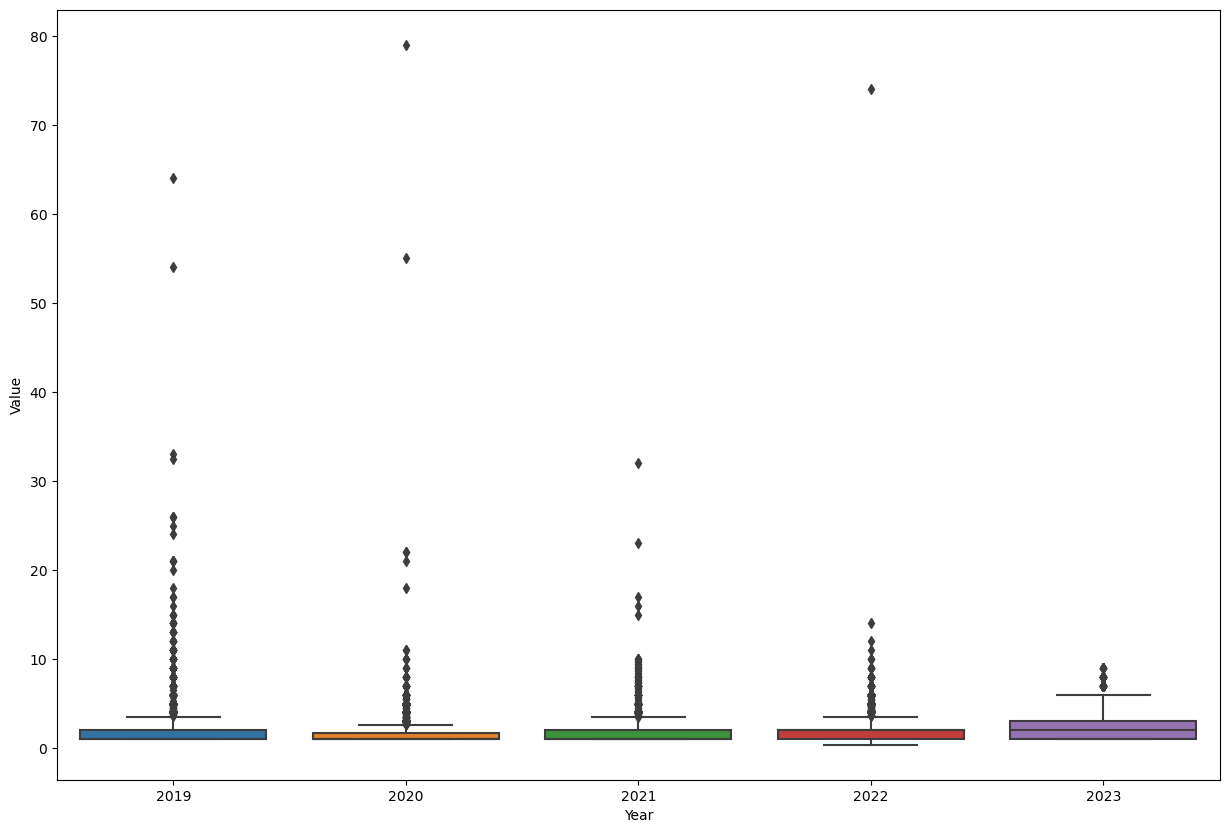

In [84]:
# SO2
sns.boxplot(data=airq[airq['Pollutant_name']=='SO2'],  x='Year', y='Value')

<AxesSubplot:xlabel='Year', ylabel='Value'>

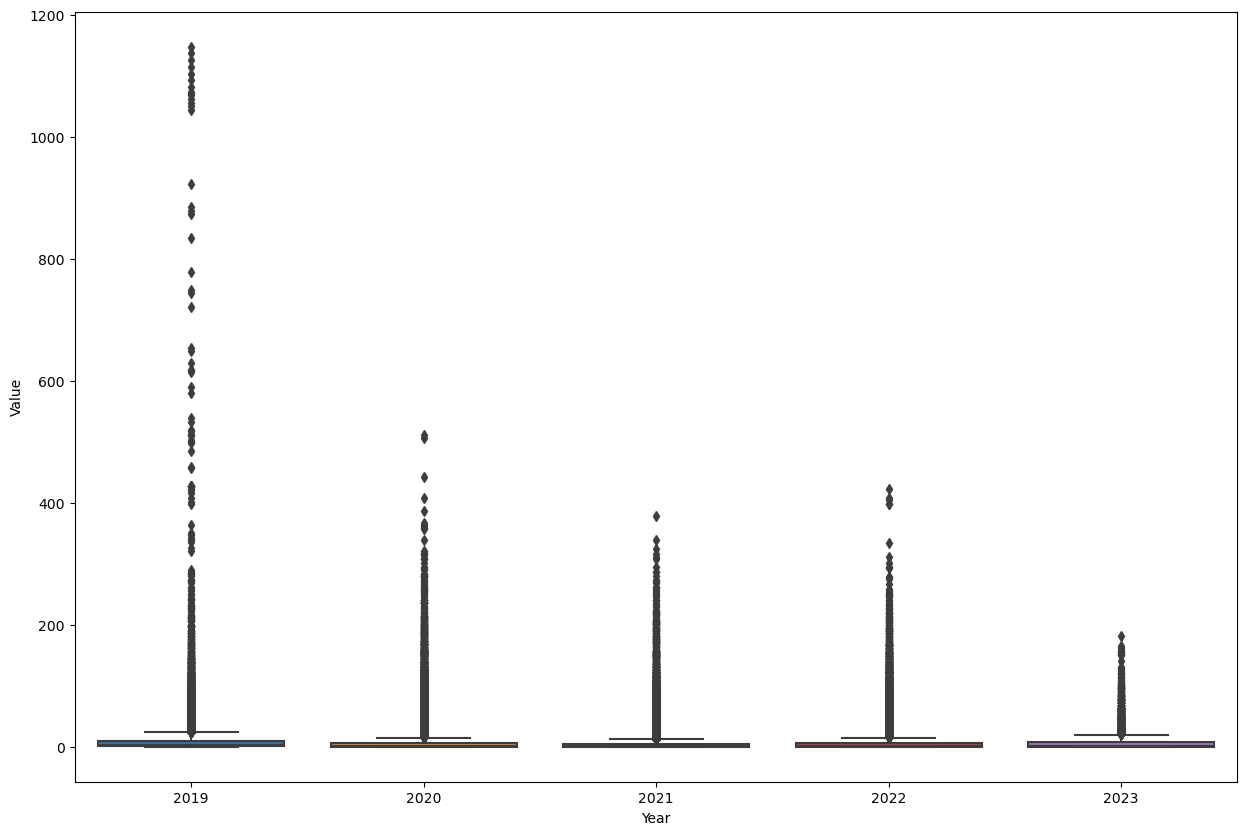

In [85]:
# NO
sns.boxplot(data=airq[airq['Pollutant_name']=='NO'],  x='Year', y='Value')

<AxesSubplot:xlabel='Year', ylabel='Value'>

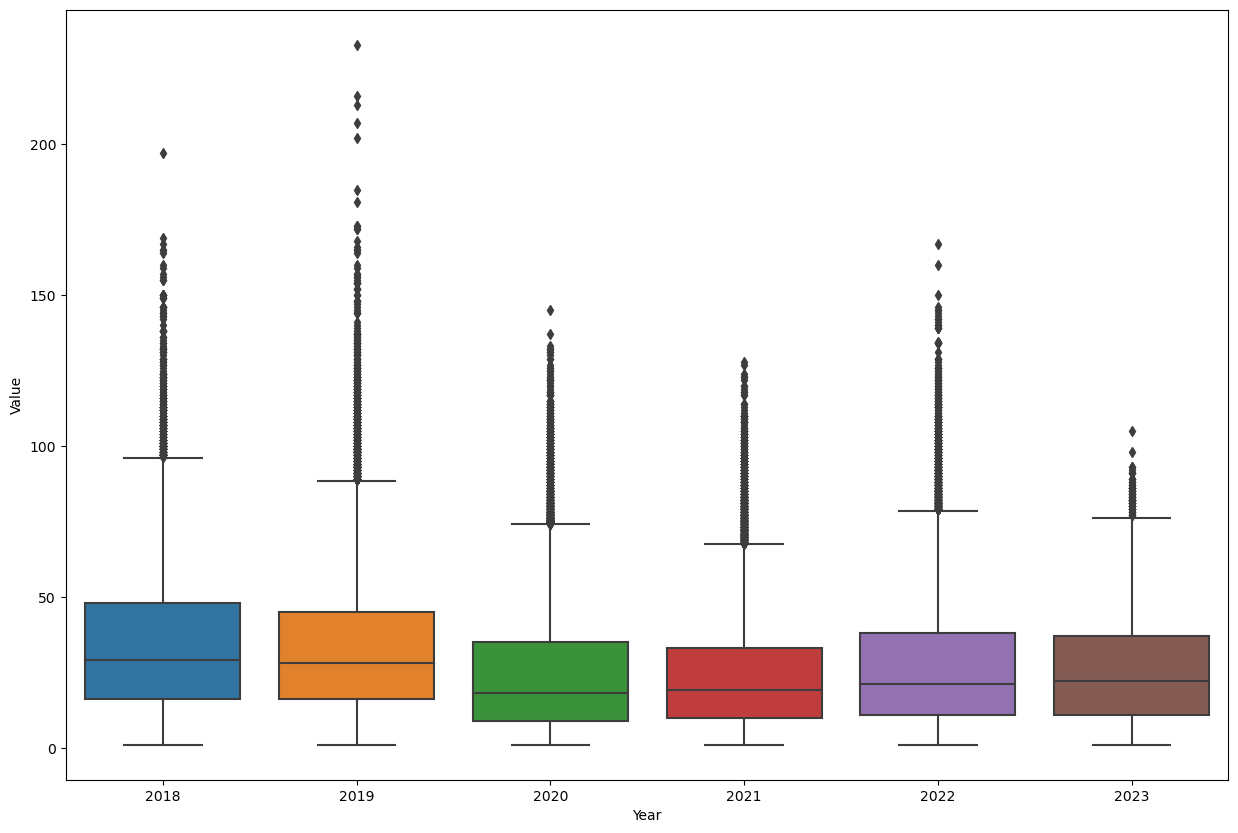

In [86]:
# NO2
sns.boxplot(data=airq[airq['Pollutant_name']=='NO2'],  x='Year', y='Value')

<AxesSubplot:xlabel='Year', ylabel='Value'>

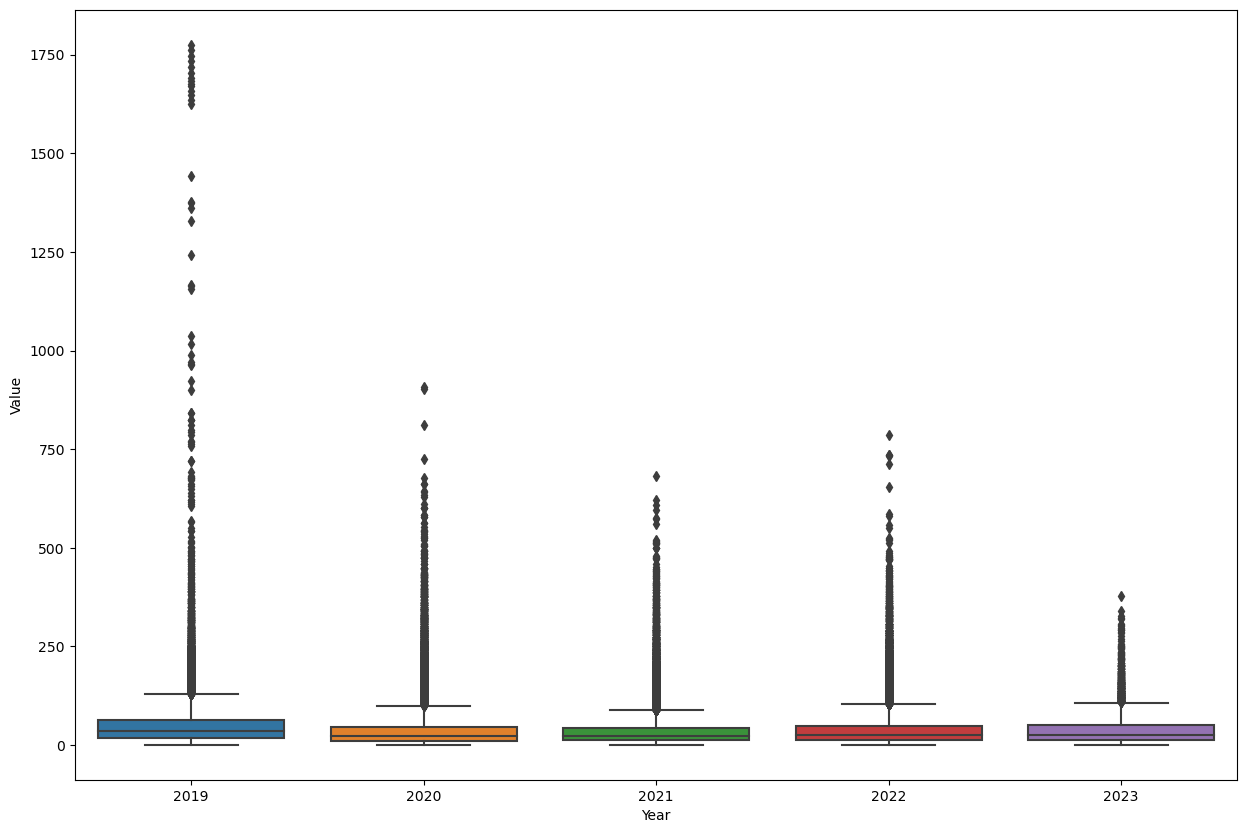

In [87]:
# NOX
sns.boxplot(data=airq[airq['Pollutant_name']=='NOx'],  x='Year', y='Value')

<AxesSubplot:xlabel='Year', ylabel='Value'>

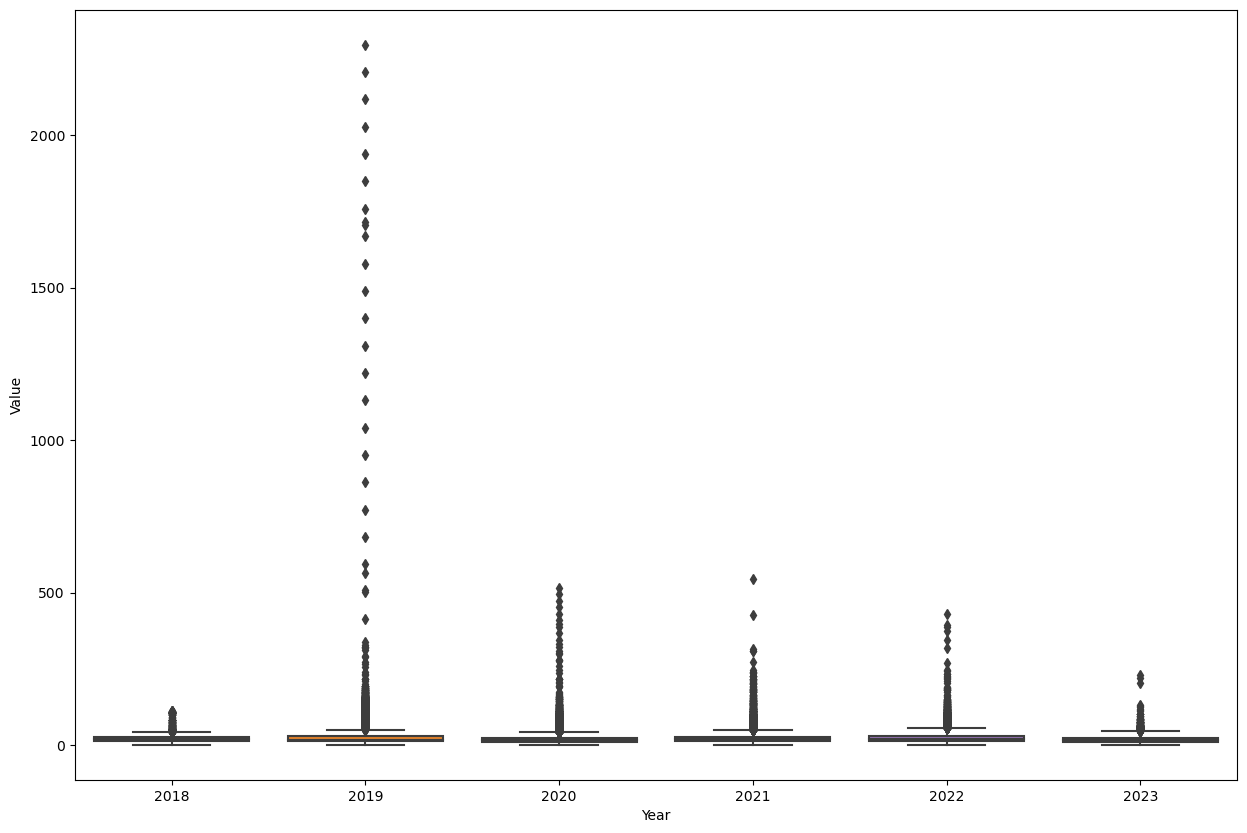

In [88]:
# PM10
sns.boxplot(data=airq[airq['Pollutant_name']=='PM10'],  x='Year', y='Value')

<AxesSubplot:xlabel='Year', ylabel='Value'>

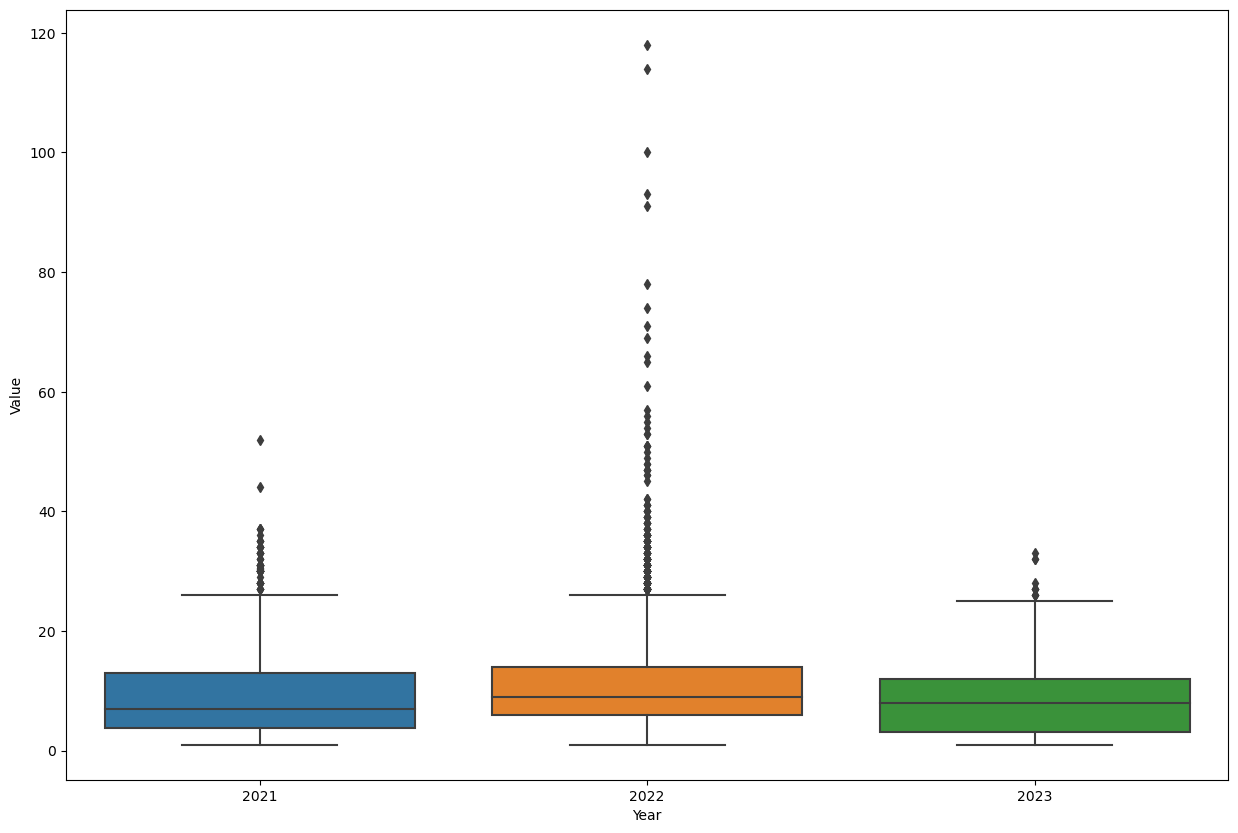

In [89]:
# PM2.5
sns.boxplot(data=airq[airq['Pollutant_name']=='PM2.5'],  x='Year', y='Value')

<AxesSubplot:xlabel='Year', ylabel='Value'>

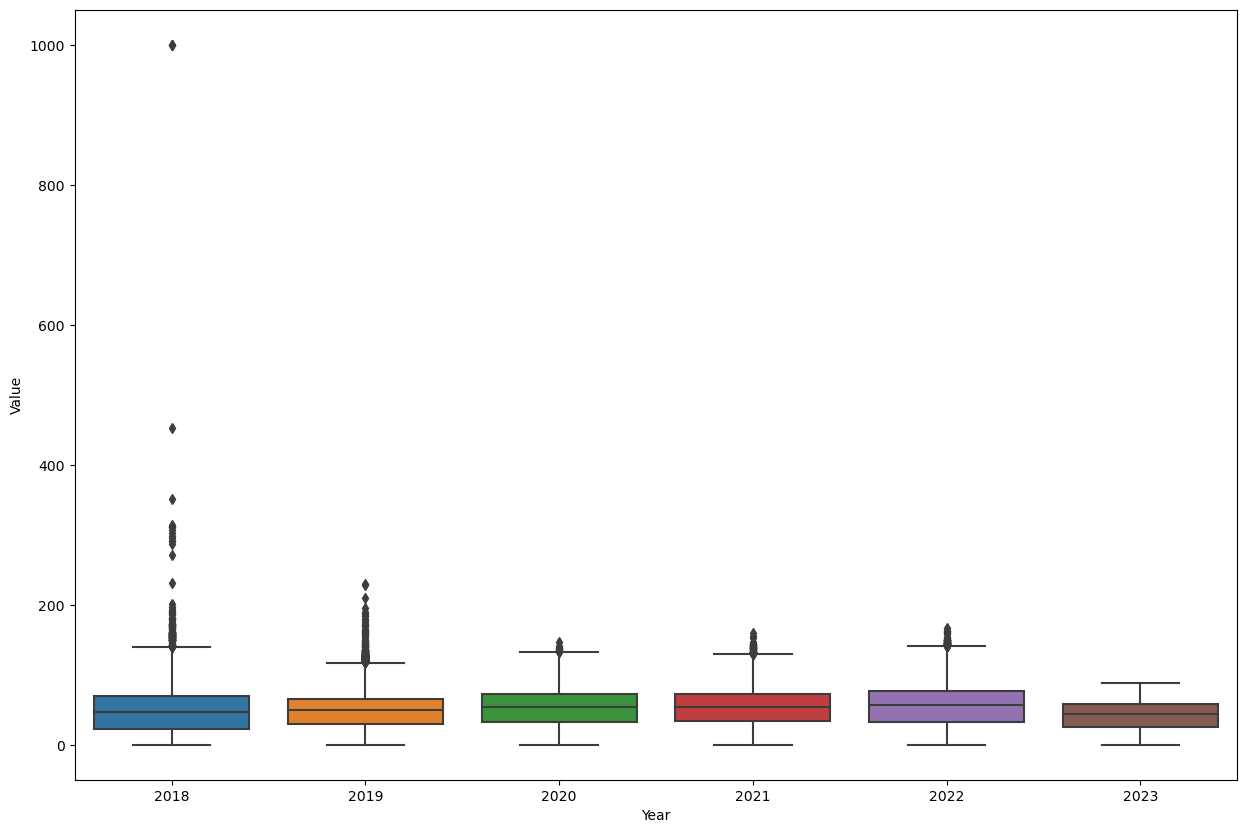

In [90]:
# O3
sns.boxplot(data=airq[airq['Pollutant_name']=='O3'],  x='Year', y='Value')

<AxesSubplot:xlabel='Year', ylabel='Value'>

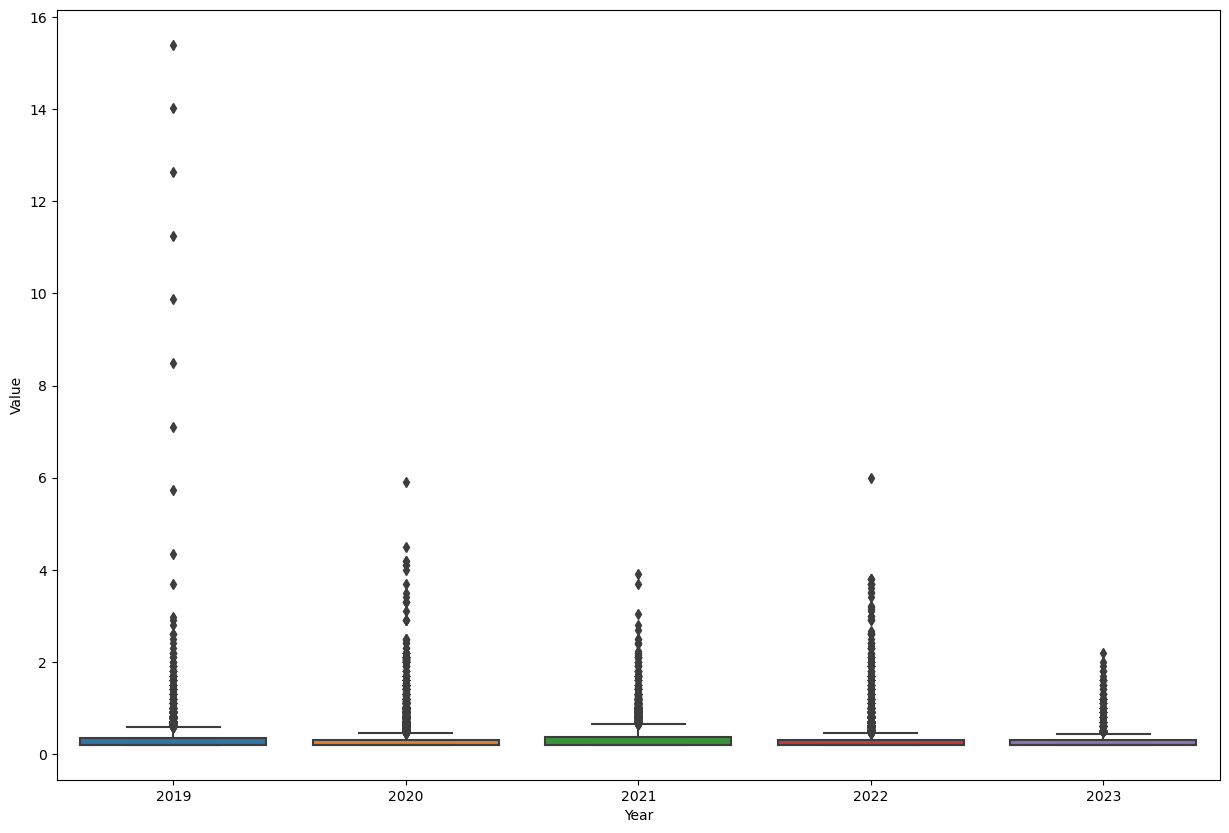

In [91]:
# CO
sns.boxplot(data=airq[airq['Pollutant_name']=='CO'],  x='Year', y='Value')

<AxesSubplot:xlabel='Year', ylabel='Value'>

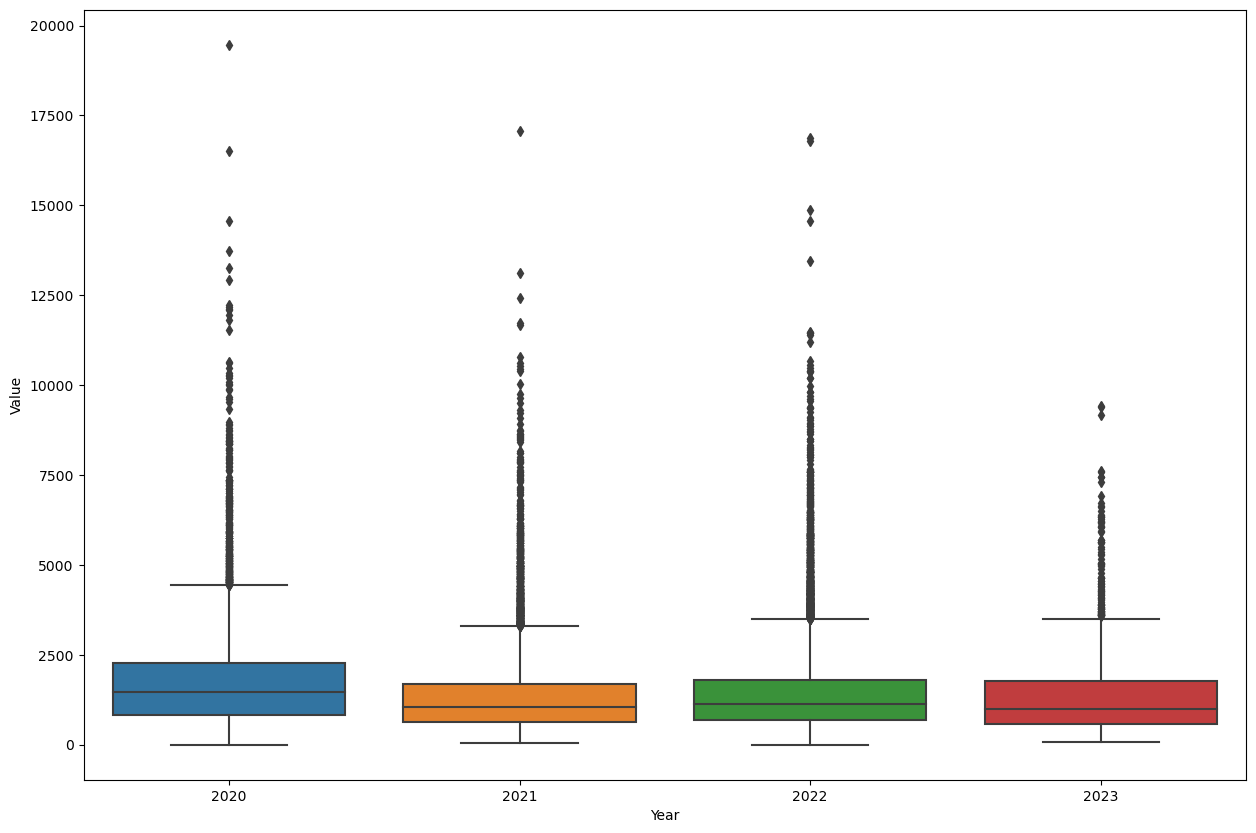

In [92]:
# Black Carbon
sns.boxplot(data=airq[airq['Pollutant_name']=='Black Carbon'],  x='Year', y='Value')

### Un contaminante, por meses

<AxesSubplot:xlabel='Month', ylabel='Value'>

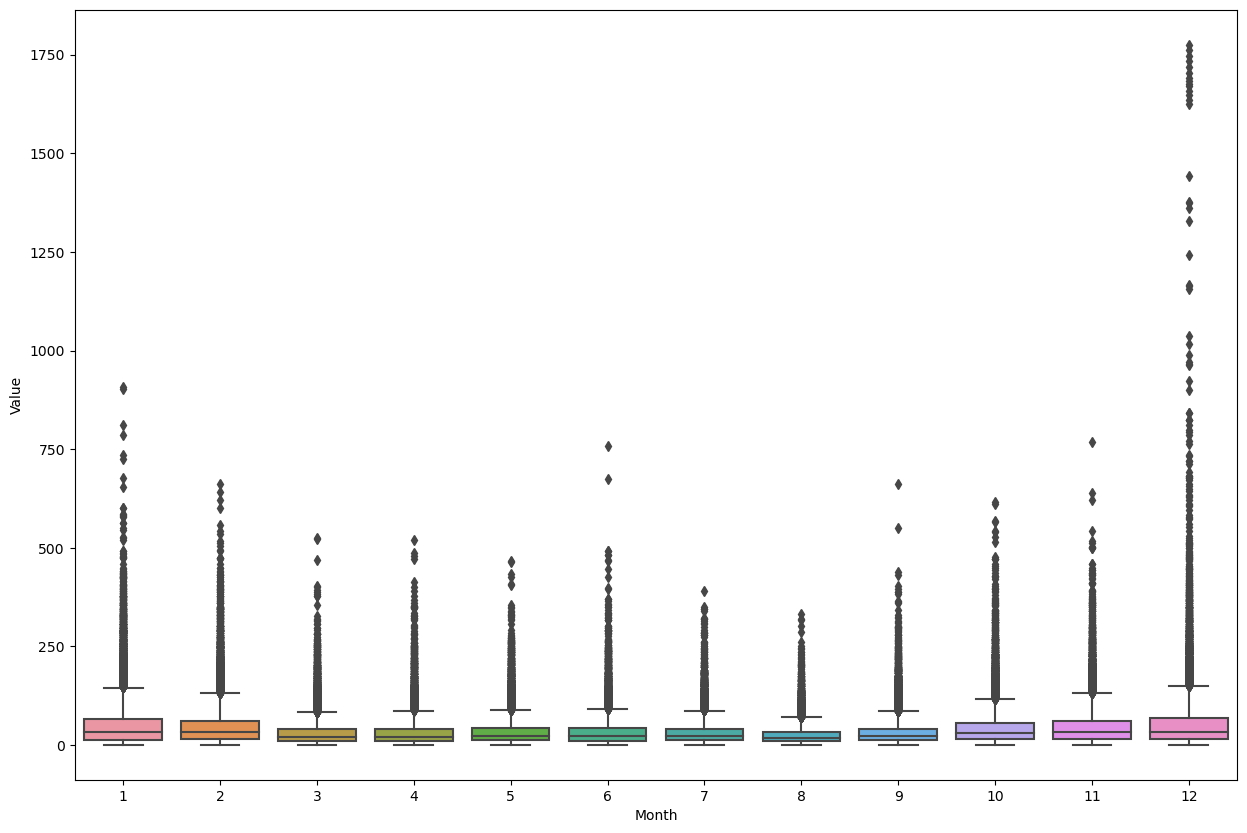

In [93]:
# NOx
sns.boxplot(data=airq[airq['Pollutant_name']=='NOx'],  x='Month', y='Value')

### Un contaminante, por Estación

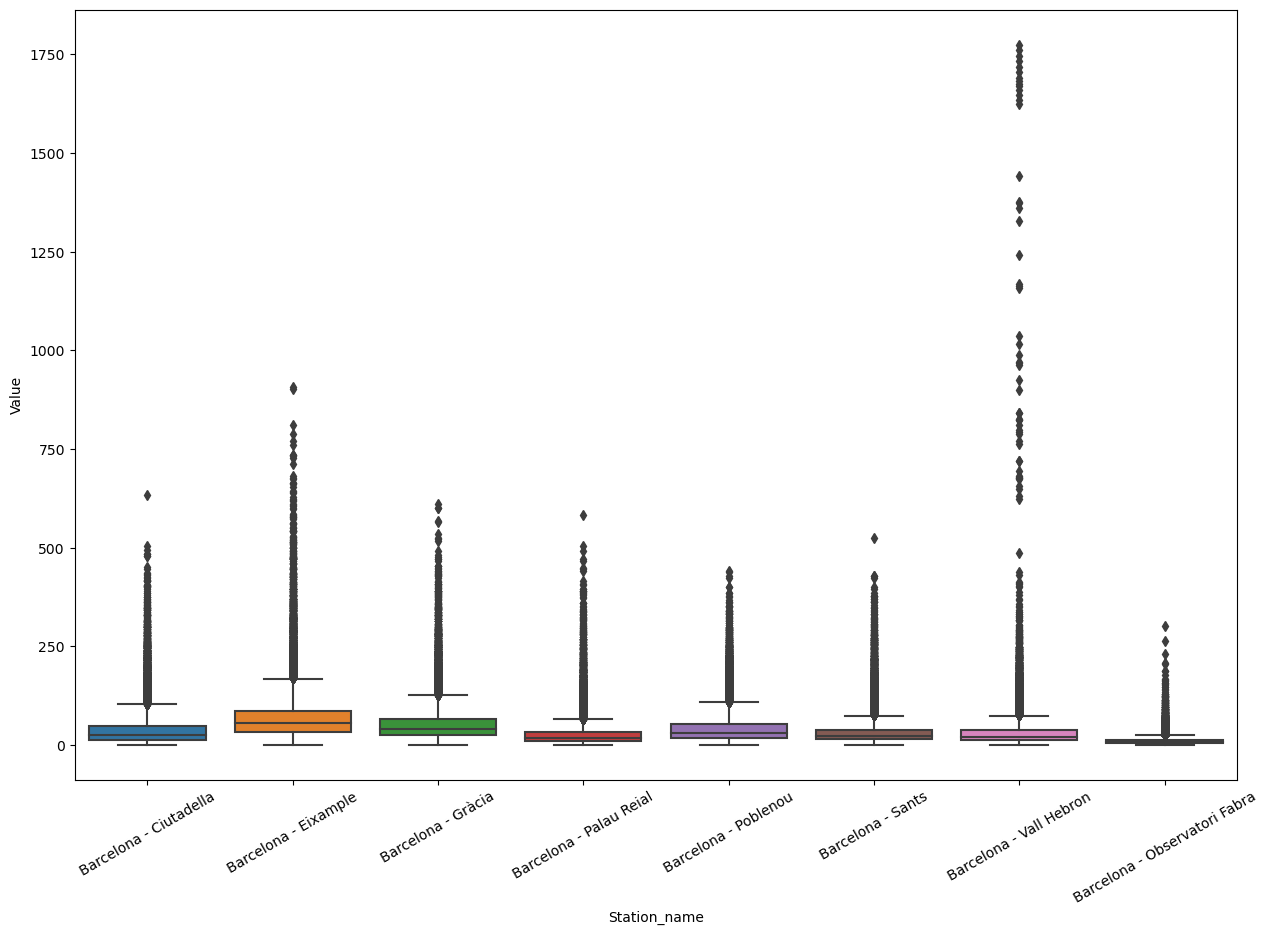

In [94]:
# NOx
ax = sns.boxplot(data=airq[airq['Pollutant_name']=='NOx'],  x='Station_name', y='Value')
_=ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

### Un contaminante, por Estación y años

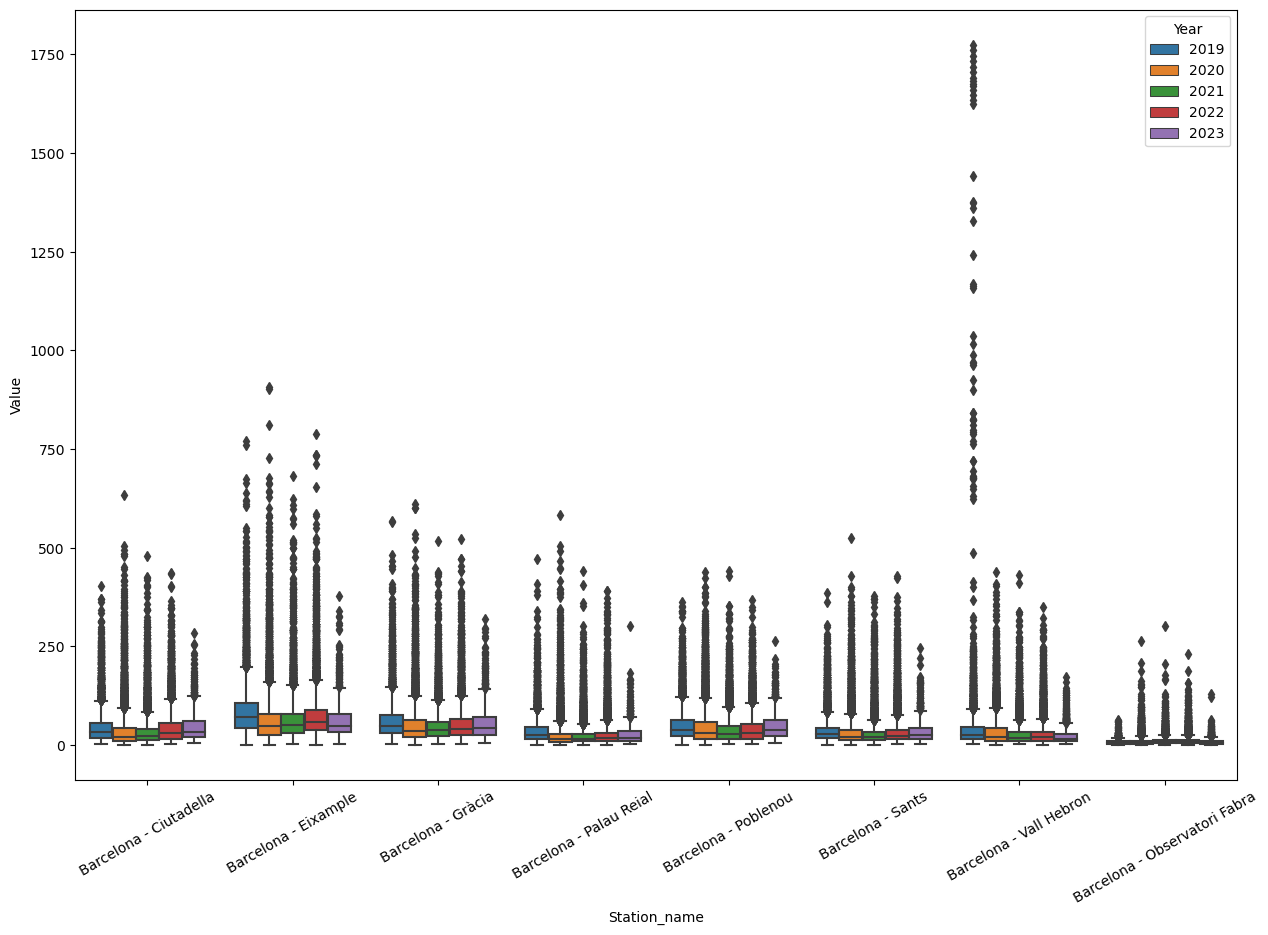

In [95]:
ax= sns.boxplot(data=airq[airq['Pollutant_name']=='NOx'],  x='Station_name', y='Value', hue='Year')
_=ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

### Un contaminante, por estaciones

<AxesSubplot:xlabel='Year', ylabel='Value'>

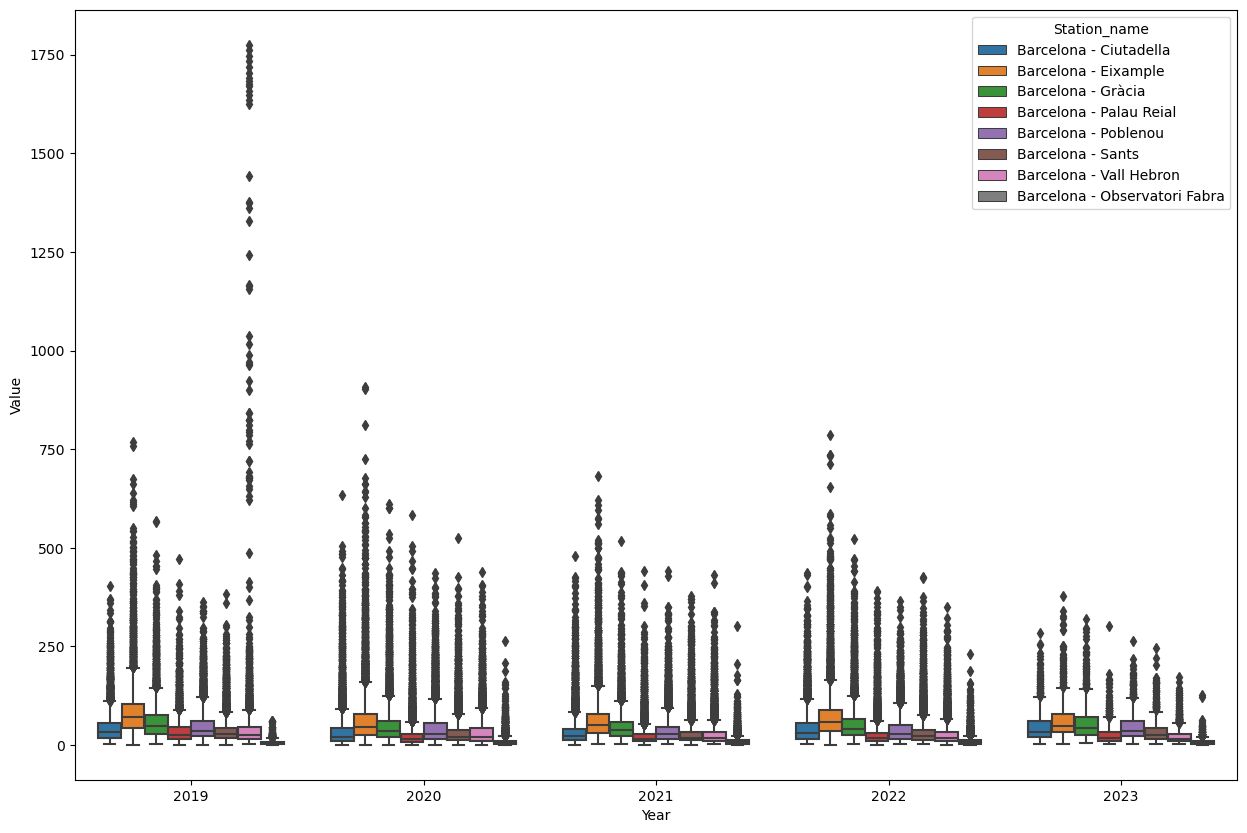

In [96]:
sns.boxplot(data=airq[airq['Pollutant_name']=='NOx'],  x='Year', y='Value', hue='Station_name')

In [97]:
select = airq[(airq['Pollutant_name']=='O3')]#&(airq['Year']==2018)]

<AxesSubplot:xlabel='Year', ylabel='Value'>

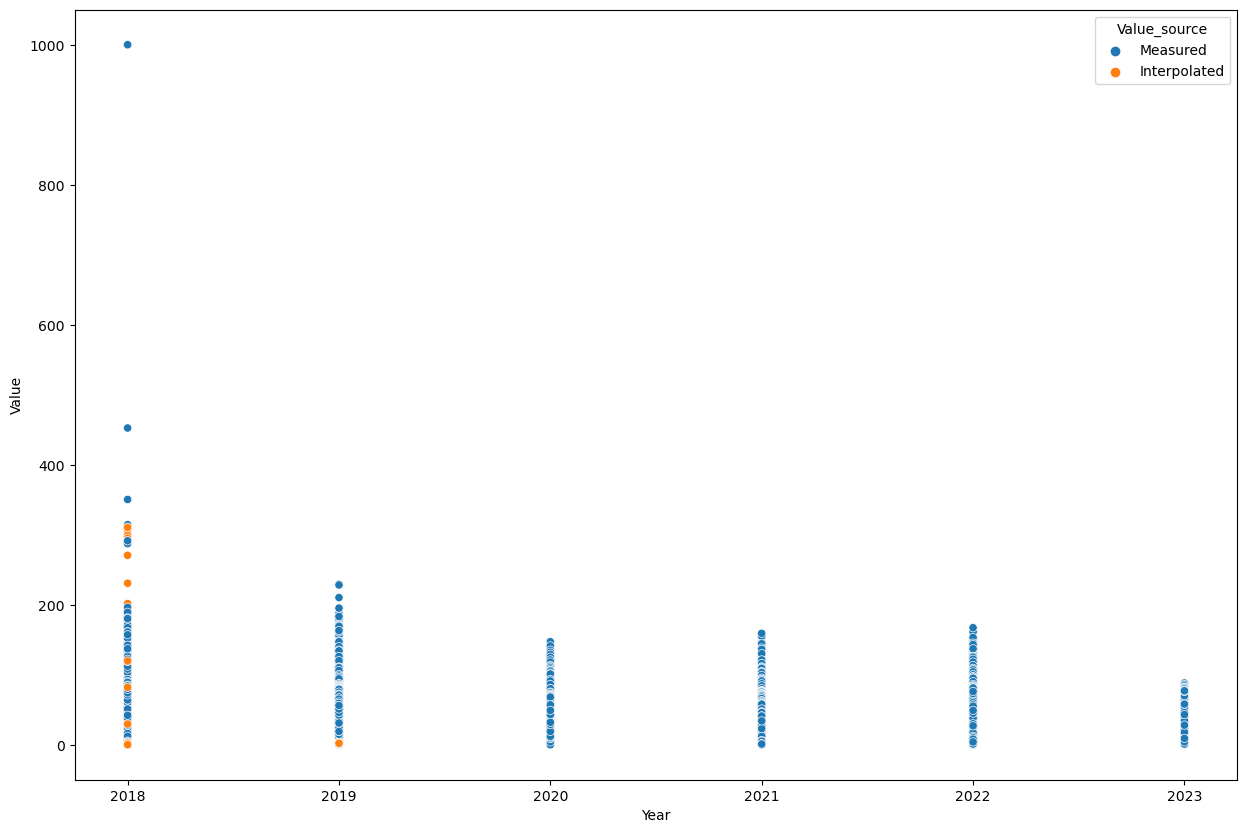

In [98]:
sns.scatterplot(data=select,  x='Year', y='Value', hue = 'Value_source')

In [99]:
select = airq[(airq['Pollutant_name']=='O3')&(airq['Year']==2021)]

<AxesSubplot:xlabel='Month', ylabel='Value'>

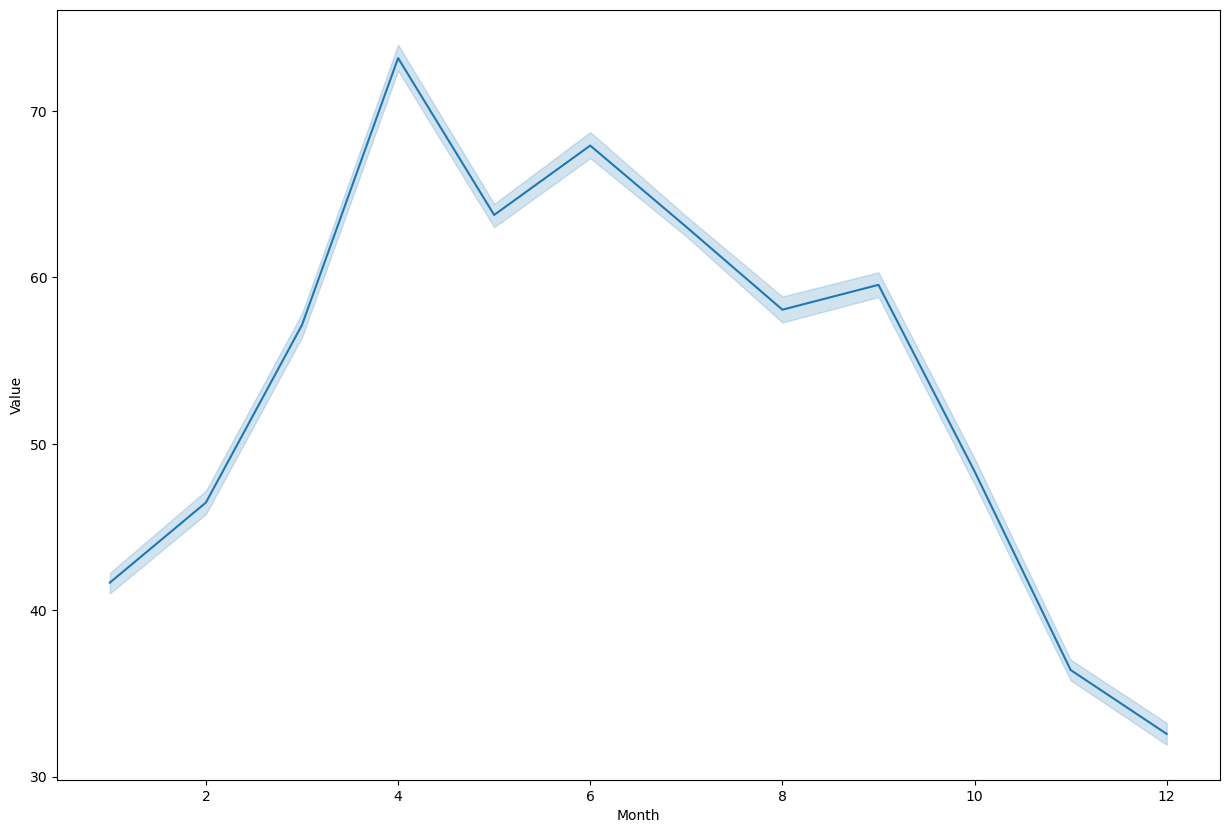

In [100]:
sns.lineplot(data=select,  x='Month', y='Value')

In [101]:
select1 = airq[(airq['Pollutant_name']=='Black Carbon')]

<AxesSubplot:xlabel='Year', ylabel='Value'>

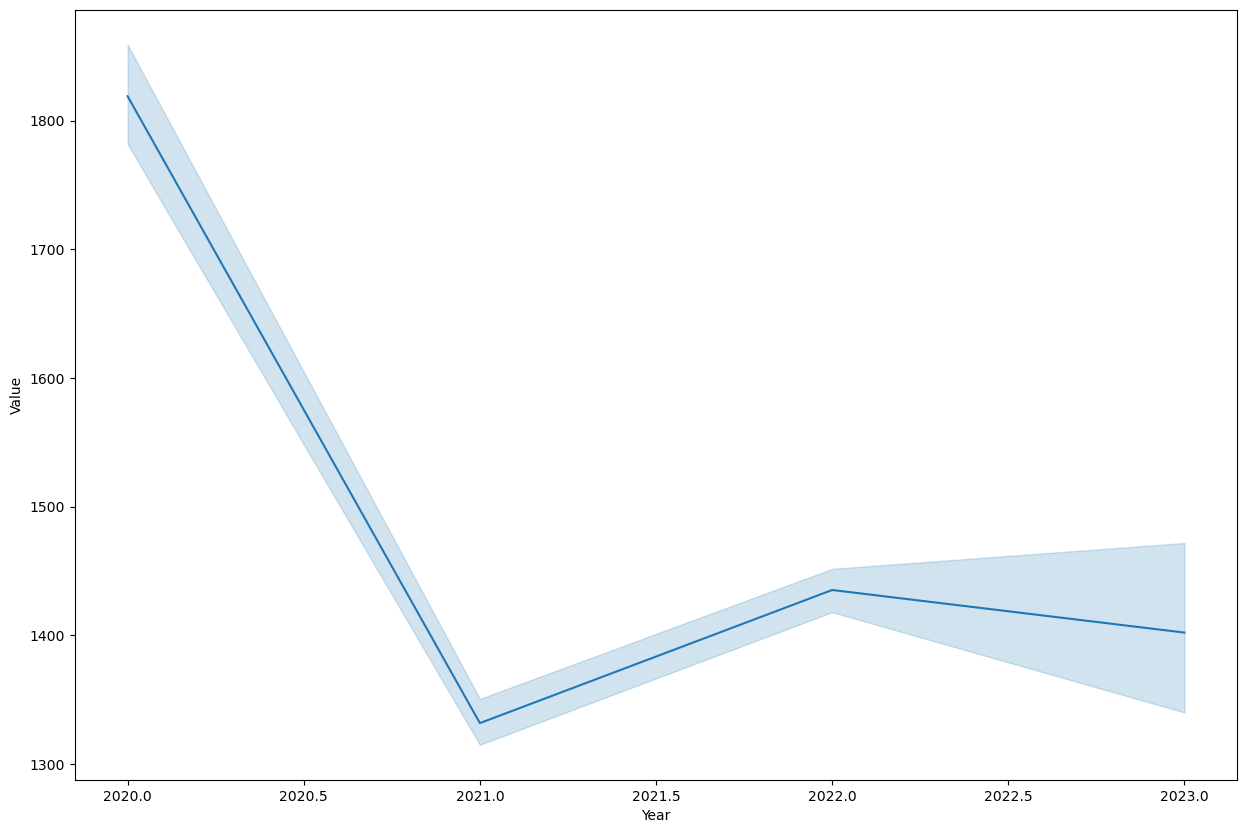

In [102]:
sns.lineplot(data=select1,  x='Year', y='Value')